# **Marketing Campaign Analysis**

## **Problem Definition**

### **The Context:**

 **- Why is this problem important to solve?**
 
 Customer segmentation is crucial because it enables businesses to understand their customer base in a more nuanced way. By grouping customers based on shared characteristics, companies can tailor their marketing strategies more effectively. This tailored approach is essential for several reasons:

1) Segmentation allows for more targeted marketing, which can lead to a better return on investment. Instead of a one-size-fits-all approach, businesses can address the specific needs and preferences of different customer groups.

2) Segmented campaigns often result in higher engagement rates, such as increased email click-throughs. Personalized communication resonates more with customers, leading to better engagement.

3) Businesses that practice customer segmentation often report significant growth in revenue. This is because targeted campaigns are more likely to convert leads into sales.

4) By understanding different customer segments, businesses can allocate their resources (time, money, efforts) more efficiently, ensuring that marketing efforts are directed towards the most receptive audiences.

### **The objective:**

 **- What is the intended goal?**
The main objective is to develop a model that can effectively segment customers for a business. This requires thorough data exploration and transformation to ensure that the data is optimally structured for the segmentation model to interpret.

### **The key questions:**

**- What are the key questions that need to be answered?**
There are 3 key questions to be answered:

1) How can you define characteristics of each customer segment?
2) How can customer segmentation improve customer engagement and loyalty?
3) What impact does segmentation have on overall business performance and revenue?

### **The problem formulation**:

**- What is it that we are trying to solve using data science?**
1) By analyzing customer's data, we understand different customer profiles and their behaviors.

2) We try to identify key segmentation variables (trying to identify independent variables and dependent variable)

3) Using statistical and machine learning techniques we can group customers into meaningful segments.

4) Afterwards, we want to meausure the impact of segmented marketing strategies on customer engagement and conversion rates.

------------------------------
## **Data Dictionary**
------------------------------

The dataset contains the following features:

1. ID: Unique ID of each customer
2. Year_Birth: Customer’s year of birth
3. Education: Customer's level of education
4. Marital_Status: Customer's marital status
5. Kidhome: Number of small children in customer's household
6. Teenhome: Number of teenagers in customer's household
7. Income: Customer's yearly household income in USD
8. Recency: Number of days since the last purchase
9. Dt_Customer: Date of customer's enrollment with the company
10. MntFishProducts: The amount spent on fish products in the last 2 years
11. MntMeatProducts: The amount spent on meat products in the last 2 years
12. MntFruits: The amount spent on fruits products in the last 2 years
13. MntSweetProducts: Amount spent on sweet products in the last 2 years
14. MntWines: The amount spent on wine products in the last 2 years
15. MntGoldProds: The amount spent on gold products in the last 2 years
16. NumDealsPurchases: Number of purchases made with discount
17. NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
18. NumStorePurchases: Number of purchases made directly in stores
19. NumWebPurchases: Number of purchases made through the company's website
20. NumWebVisitsMonth: Number of visits to the company's website in the last month
21. AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
22. AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
23. AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
24. AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
25. AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
26. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
27. Complain: 1 If the customer complained in the last 2 years, 0 otherwise

**Note:** You can assume that the data is collected in the year 2016.

## **Import the necessary libraries and load the data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")


## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values
- Drop the column which has no null values

In [2]:
df = pd.read_csv('marketing_campaign.csv')

In [3]:
df.shape

(2240, 27)

In [4]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  NumStorePurchases  \
0  04-09-2012       58       635  ...                   10                  4   
1  08-03-2014       38        11  ...                    1                  2   
2  21-08-2013       26       426  ...                    2                 10   
3  10-02-2014       26        11  ...                    0                  4   
4  19-01-2014       94       173  ...                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  
0             0         0         1  
1             0         0         0  
2             0         0         0  
3             0         0         0  
4             0         0         0  

[5 rows x 27 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [7]:
df[df['Income'].isna()]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Graduation        Married     NaN        0         0   
319    2863        1970  Graduation         Single     NaN        1         2   
1379  10475        1970      Master       Together     NaN        0         1   
1382   2902        1958  Graduation       Together     NaN        1         1   
1383   4345        1964    2n Cycle         Single     NaN        1         1   
1386   3769        1972         PhD       Together     NaN        1         0   
2059   7187        1969      Master       Together     NaN        1         1   
2061   1612        1981         PhD         Single     NaN        1         0   
2078   5079        1971  Graduation        Married     NaN        1         1   
2079  10339        1954      Master       Together     NaN        0         1   
2081   3117        1955  Graduation         Single     NaN        0         1   
2084   5250        1943      Master          Widow     NaN        0         0   
2228   8720        1978    2n Cycle       Together     NaN        0         0   

     Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
10    15-11-2013       11         5  ...                    0   
27    20-02-2013       19         5  ...                    0   
43    05-11-2013       80        81  ...                    3   
48    01-01-2014       96        48  ...                    1   
58    17-06-2013       57        11  ...                    0   
71    14-09-2012       25        25  ...                    0   
90    19-11-2012        4       230  ...                    2   
91    27-05-2014       45         7  ...                    0   
92    23-11-2013       87       445  ...                    4   
128   11-07-2013       23       352  ...                    1   
133   11-08-2013       96       231  ...                    5   
312   03-06-2013       69       861  ...                    5   
319   23-08-2013       67       738  ...                    3   
1379  01-04-2013       39       187  ...                    2   
1382  03-09-2012       87        19  ...                    0   
1383  12-01-2014       49         5  ...                    0   
1386  02-03-2014       17        25  ...                    0   
2059  18-05-2013       52       375  ...                   10   
2061  31-05-2013       82        23  ...                    0   
2078  03-03-2013       82        71  ...                    1   
2079  23-06-2013       83       161  ...                    1   
2081  18-10-2013       95       264  ...                    1   
2084  30-10-2013       75       532  ...                    5   
2228  12-08-2012       53        32  ...                    0   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
10                    2                  7             0             0   
27                    0                  1             0             0   
43                    4                  2             0             0   
48                    4                  6             0     

In [8]:
df.drop(columns='ID', inplace=True)

The 'ID' column in the dataset has no missing values and the count of its unique entries matches the total number of observations. This suggests that 'ID' serves merely as an identifier for each data entry and does not contribute meaningful information for predictive analysis.

In [9]:
mean_income = df["Income"].mean()

df["Income"].fillna(mean_income, inplace=True)

The "Income" column contains 27 missing values, which can be replaced with the mean income of the column. This approach will ensure that the overall distribution of the "Income" data remains consistent while filling in the missing values.

In [10]:
df["Income"].isna().sum()

0

#### **Observations and Insights from the Data overview: The dataset consists of 2240 rows and 27 columns. Within this dataset, the "Income" column contains 27 missing (NaN) values.**

## **Exploratory Data Analysis (EDA)**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables
2. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights
3. Are all categories different from each other or can we combine some categories? Is 2n Cycle different from Master?
4. There are 8 categories in Marital_Status with some categories having very low count of less than 5. Can we combine these categories with other categories?

In [11]:
df.describe()

Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2240.000000    2240.000000  2240.000000  2240.000000  2240.000000   
mean   1968.805804   52247.251354     0.444196     0.506250    49.109375   
std      11.984069   25037.797168     0.538398     0.544538    28.962453   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35538.750000     0.000000     0.000000    24.000000   
50%    1970.000000   51741.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68289.750000     1.000000     1.000000    74.000000   
max    1996.000000  666666.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  ...  NumCatalogPurchases  NumStorePurchases  \
count       2240.000000  ...          2240.000000        2240.000000   
mean          27.062946  ...             2.662054           5.790179   
std           41.280498  ...             2.923101           3.250958   
min            0.000000  ...             0.000000           0.000000   
25%            1.000000  ...             0.000000           3.000000   
50%            8.000000  ...             2.000000           5.000000   
75%           33.000000  ...             4.000000           8.000000   
max          263.000000  ...            28.000000          13.000000   

       NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count        2240.000000   2240.000000   2240.000000   2240.000000   
mean            5.316518      0.072768      0.074554      0.072768   
std             2.426645      0.259813      0.262728      0.259813   
min             0.000000      0.000000      0.000000      0.000000   
25%             3.000000      0.000000      0.000000      0.000000   
50%             6.000000      0.000000      0.000000      0.000000   
75%             7.000000      0.000000      0.000000      0.000000   
max            20.000000      1.000000      1.000000      1.000000   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  
count   2240.000000   2240.000000  2240.000000  2240.000000  
mean       0.064286      0.012946     0.009375     0.149107  
std        0.245316      0.113069     0.096391     0.356274  
min        0.000000      0.000000     0.000000     0.000000  
25%        0.000000      0.000000     0.000000     0.000000  
50%        0.000000      0.000000     0.000000     0.000000  
75%        0.000000      0.000000     0.000000     0.000000  
max        1.000000      1.000000     1.000000     1.000000  

[8 rows x 23 columns]

In [12]:
df["Education"].replace("2n Cycle", "Master", inplace=True) # Replacing 2nd Cycle with Master.
df["Marital_Status"].replace({"Alone": "Single", "Absurd": "Single", "YOLO": "Single"}, inplace=True) # Replasing these categories with Single categorie.

In [13]:
df.nunique()

Year_Birth               59
Education                 4
Marital_Status            5
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

### **Univariate Analysis on Numerical and Categorical data**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables. 

- Plot histogram and box plot for different numerical features and understand how the data looks like.
- Explore the categorical variables like Education, Kidhome, Teenhome, Complain.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. How does the distribution of Income variable vary across the dataset?

Most of income comes from 0 - 100,000, it has some higher outliers but not like in the case of MntFruits or MntFishProducts columns.

2. The histogram and the box plot are showing some extreme value on the right side of the distribution of the 'Income' feature. Can we consider them as outliers and remove or should we analyze these extreme values?
These can be eliminated as they constitute a minor portion of the data.



<Axes: xlabel='Income'>

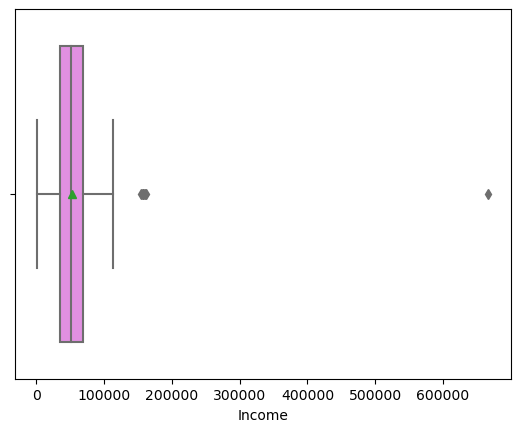

In [14]:
sns.boxplot(data=df, x='Income', showmeans=True, color="violet")

In [15]:

# Finding the first quartile
Q1 = df.quantile(q=0.25)

# Finding the third quartile
Q3 = df.quantile(q=0.75)

# Finding the Inter Quartile Range
IQR = Q3 - Q1

# Calculating the Upper Whisker for the Income variable
upper_whisker = (Q3 + 1.5 * IQR)["Income"]

# Printing Upper Whisker
print(upper_whisker)

117416.25


In [16]:
df[df.Income > upper_whisker]

Year_Birth   Education Marital_Status    Income  Kidhome  Teenhome  \
164         1973         PhD        Married  157243.0        0         1   
617         1976         PhD       Together  162397.0        1         1   
655         1975  Graduation       Divorced  153924.0        0         0   
687         1982         PhD        Married  160803.0        0         0   
1300        1971      Master       Together  157733.0        1         0   
1653        1977  Graduation       Together  157146.0        0         0   
2132        1949         PhD        Married  156924.0        0         0   
2233        1977  Graduation       Together  666666.0        1         0   

     Dt_Customer  Recency  MntWines  MntFruits  ...  NumCatalogPurchases  \
164   01-03-2014       98        20          2  ...                   22   
617   03-06-2013       31        85          1  ...                    0   
655   07-02-2014       81         1          1  ...                    0   
687   04-08-2012       21        55         16  ...                   28   
1300  04-06-2013       37        39          1  ...                    0   
1653  29-04-2013       13         1          0  ...                   28   
2132  29-08-2013       85         2          1  ...                    0   
2233  02-06-2013       23         9         14  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
164                   0                  0             0             0   
617                   1                  1             0             0   
655                   0                  0             0             0   
687                   1                  0             0             0   
1300                  1                  1             0             0   
1653                  0                  1             0             0   
2132                  0                  0             0             0   
2233                  3                  6             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
164              0             0             0         0         0  
617              0             0             0         0         0  
655              0             0             0         0         0  
687              0             0             0         0         0  
1300             0             0             0         0         0  
1653             0             0             0         0         0  
2132             0             0             0         0         0  
2233             0             0             0         0         0  

[8 rows x 26 columns]

In [17]:
df.quantile(q=0.995)["Income"]

102122.94999999997

In [18]:
df.drop(index=[164, 617, 655, 687, 1300, 1653, 2132, 2233], inplace=True)

In [19]:
df[df.Income > upper_whisker]

Empty DataFrame
Columns: [Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Response]
Index: []

[0 rows x 26 columns]

<Axes: xlabel='Income', ylabel='Count'>

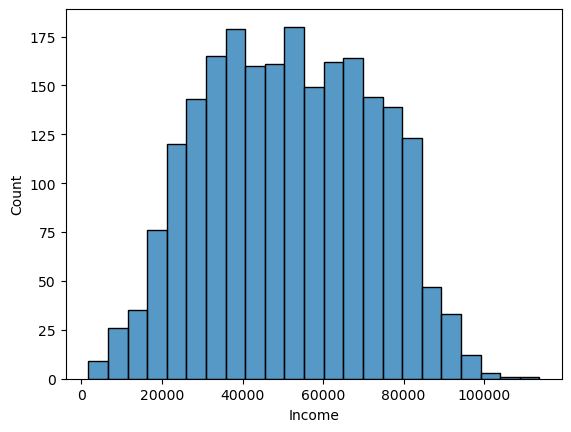

In [20]:
sns.histplot(data=df, x='Income')

In [21]:
# Univariate statistics function of countplots. 
def countplot(v, d, c, df):
    fig, axes = plt.subplots(1, 3, figsize=(12, 2)) 


    sns.countplot(data=df, x=v, ax=axes[0])
    axes[0].set_title(f'Countplot of {v}')

   
    sns.countplot(data=df, x=d, ax=axes[1])
    axes[1].set_title(f'Countplot of {d}')

 
    sns.countplot(data=df, x=c, ax=axes[2])
    axes[2].set_title(f'Countplot of {c}')
    
    

    plt.tight_layout()
    plt.show()

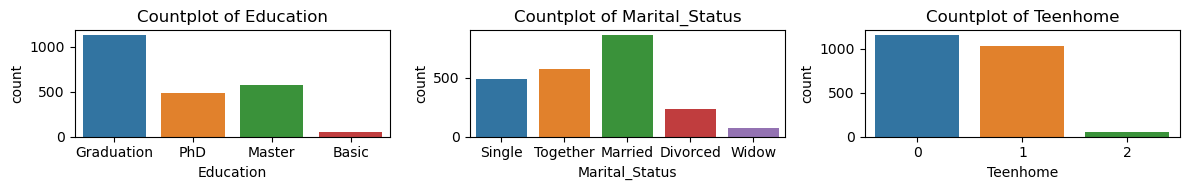

In [22]:
countplot('Education', 'Marital_Status', 'Teenhome', df)

<Axes: xlabel='Kidhome', ylabel='count'>

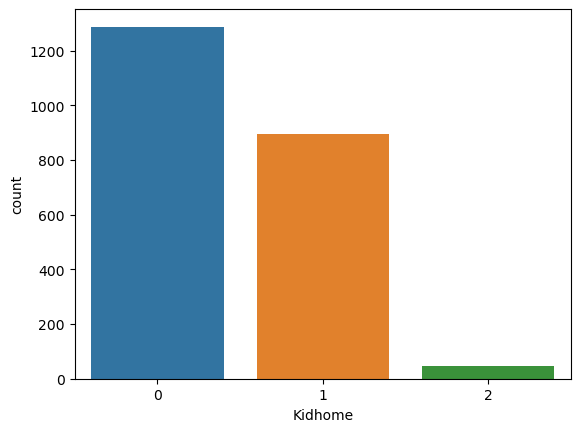

In [23]:
sns.countplot(x= 'Kidhome',data = df)

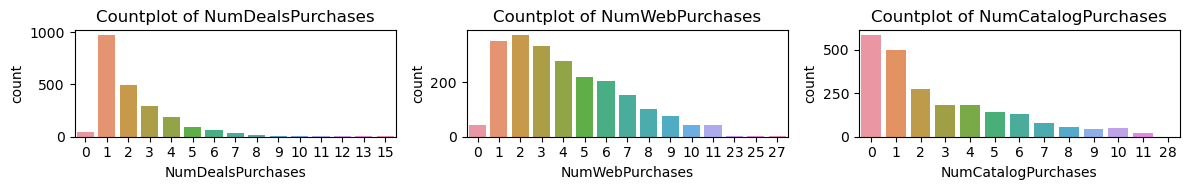

In [24]:
countplot('NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', df)

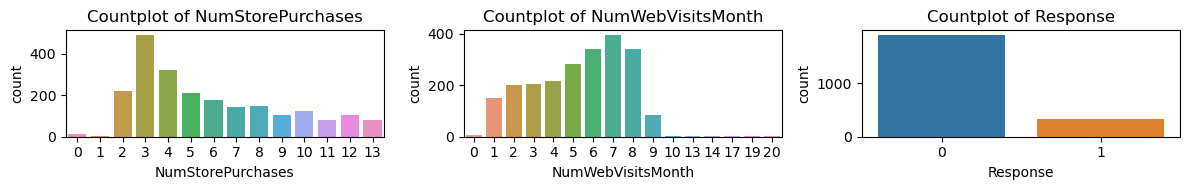

In [25]:
countplot('NumStorePurchases', 'NumWebVisitsMonth', 'Response', df)

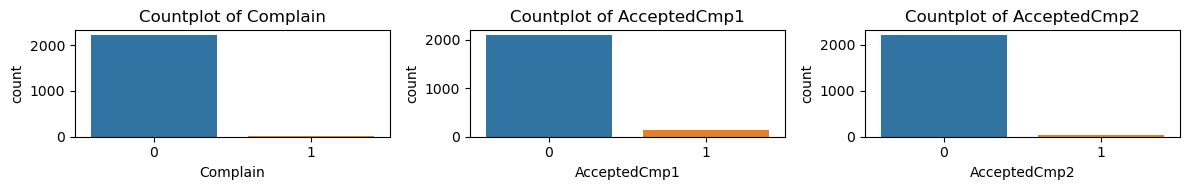

In [26]:
countplot('Complain', 'AcceptedCmp1', 'AcceptedCmp2', df)

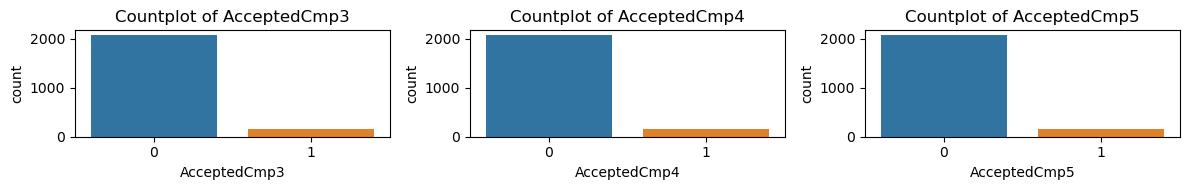

In [27]:
countplot('AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', df)

In [28]:
# Univariate statistics function of boxplots. 
def boxplot(g, h, j, df):
    fig, axes = plt.subplots(1, 3, figsize=(12, 2)) 


    sns.boxplot(data=df, x=g, ax=axes[0])
    axes[0].set_title(f'Boxplot of {g}')

   
    sns.boxplot(data=df, x=h, ax=axes[1])
    axes[1].set_title(f'Boxplot of {h}')

 
    sns.boxplot(data=df, x=j, ax=axes[2])
    axes[2].set_title(f'Boxplot of {j}')
    
    

    plt.tight_layout()
    plt.show()

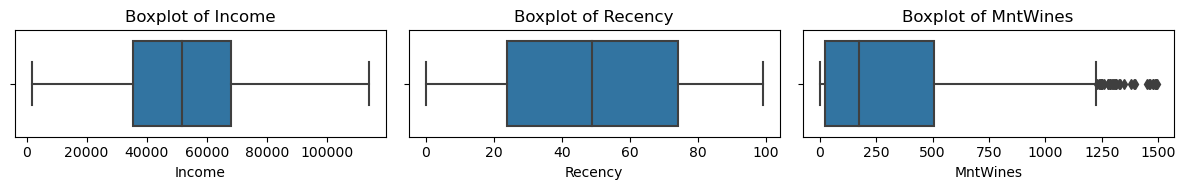

In [29]:
boxplot('Income','Recency','MntWines', df)

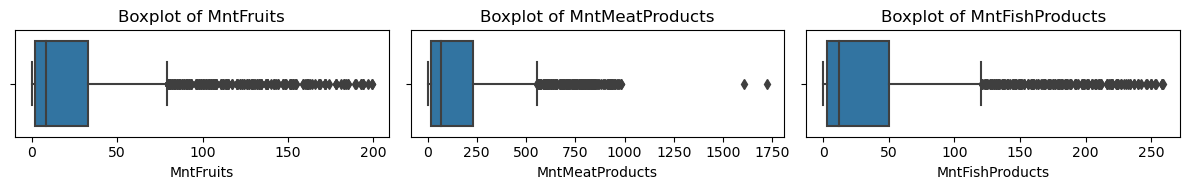

In [30]:
boxplot('MntFruits','MntMeatProducts','MntFishProducts', df)

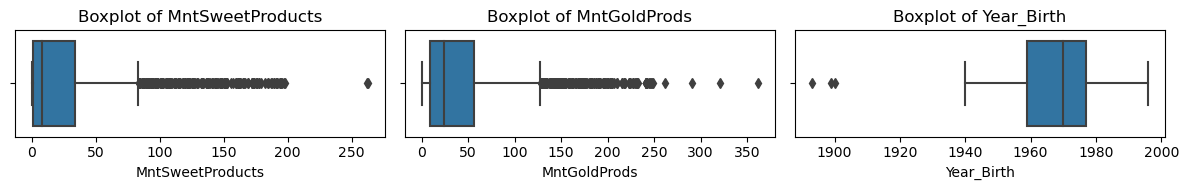

In [31]:
boxplot('MntSweetProducts','MntGoldProds','Year_Birth', df)

**Observations:**

**1) Most Purchases Made with Discount: 1 Purchase per Customer**

This suggests that customers may be attracted to make at least one purchase due to a discount offer. However, it doesn't seem to encourage repeated purchases beyond the first discounted transaction.

**2) Most Prevalent Amount of Purchases: 1-3 Purchases per Customer**

This range indicates a moderate level of customer engagement with our website. It shows that while some customers may be making multiple purchases, there is a limit to their engagement.

**3) Purchases Made Through Catalogue: Most Popular Number is 0 per Customer**

This indicates that the catalogue is not a very effective sales channel. It might be worth exploring why customers are not utilizing this channel. Is it due to lack of awareness, preference for digital channels, or some other reason?

**4) Purchases Made Directly from Store: 3 Purchases per Customer**

This is a positive indication of customer engagement in the physical store. Customers who visit the store seem to make multiple purchases, suggesting effective in-store marketing or customer service.

**5) Website Visits Last Month: Most Prevalent Range 6-8 Times**

A relatively high frequency of website visits suggests good customer engagement online. 

**6) Most Customers Didn’t Accept the Offer in the Last Campaign**

This could indicate that the offers in the last campaign were not appealing or relevant to your customer base. It's important to analyze the campaign's targeting, messaging, and the value proposition of the offers.

**7) Most Customers Didn’t Complain in the Last 2 Years**

While initially this might seem positive, the lack of complaints could also indicate a passive customer base or an ineffective feedback system. It's crucial to ensure there are easy and accessible channels for customers to provide feedback.

Based on these insights, we need to consider strategies like enhancing the effectiveness of your marketing campaigns, improving the catalogue's appeal, leveraging the high engagement in physical stores and on the website, and revamping the feedback system to encourage more customer interaction. Additionally, analyzing why discounts lead to only a single purchase could help in developing strategies for repeat sales.

### **Bivariate Analysis**

 - Analyze different categorical and numerical variables and check how different variables are related to each other.
 - Check the relationship of numerical variables with categorical variables.

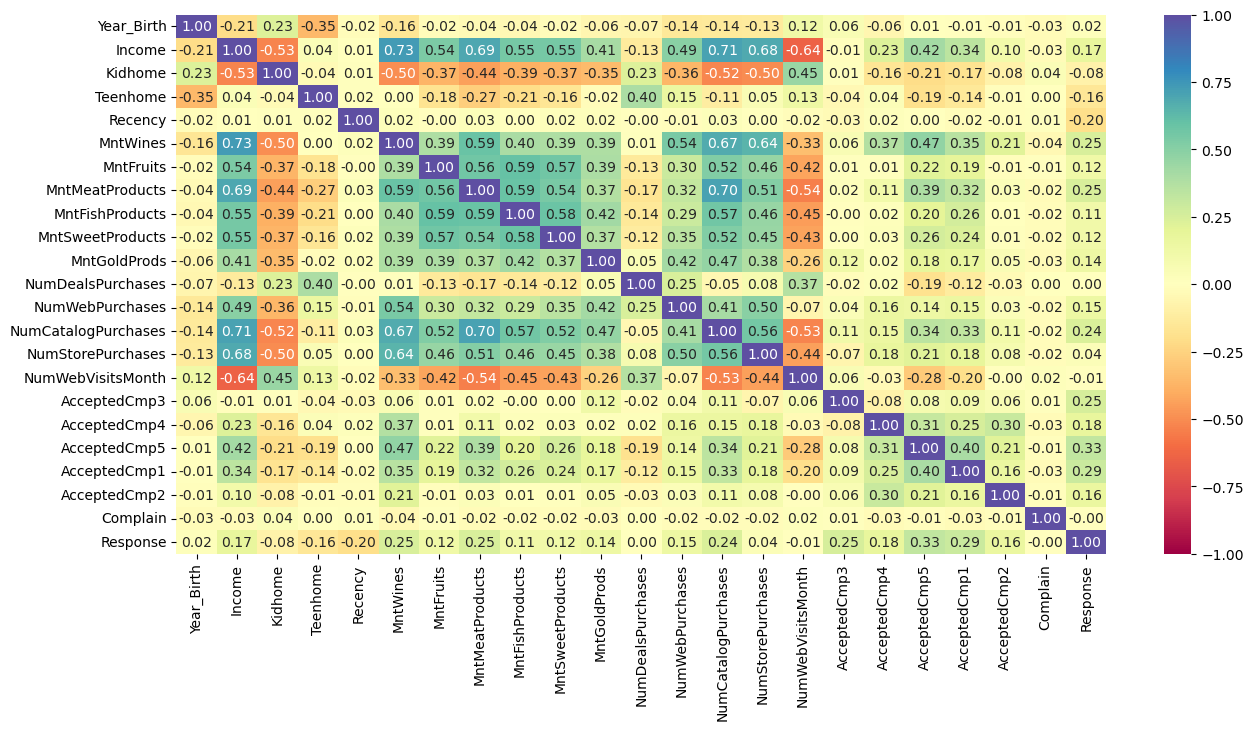

In [32]:
plt.figure(figsize=(15, 7))

correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

plt.show()

<Axes: xlabel='Kidhome', ylabel='Income'>

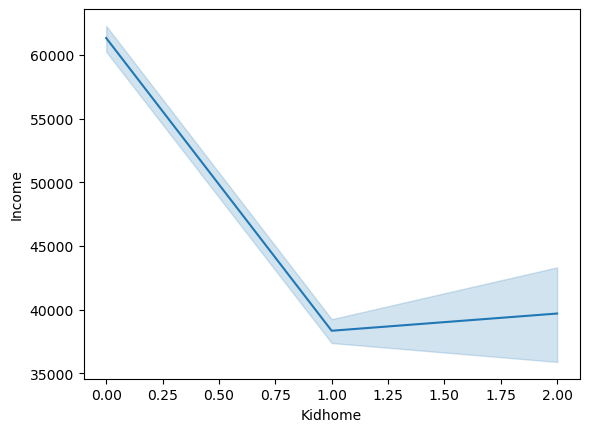

In [33]:
sns.lineplot(x='Kidhome', y='Income', data=df)

<Axes: xlabel='Marital_Status', ylabel='Income'>

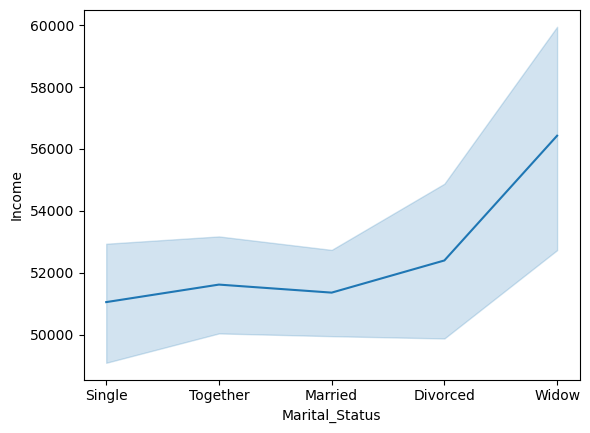

In [34]:
sns.lineplot(x='Marital_Status', y='Income', data=df)

<Axes: xlabel='Education', ylabel='Income'>

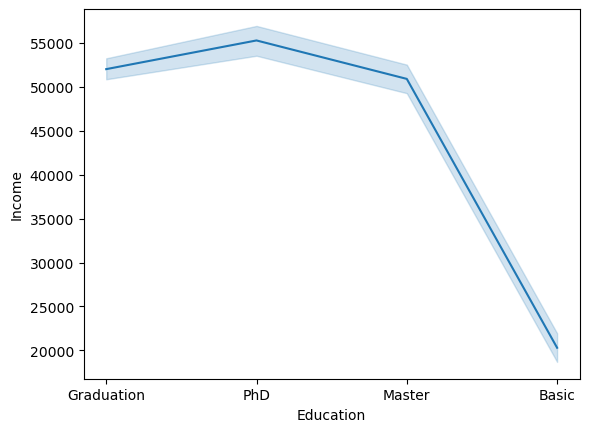

In [35]:
sns.lineplot(x='Education', y='Income', data=df)

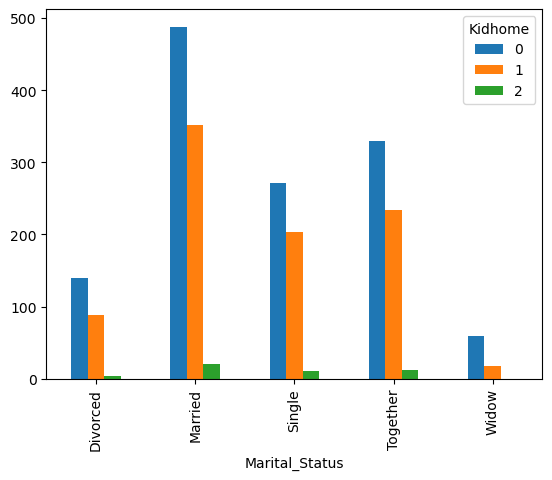

In [36]:
crosstab_data = pd.crosstab(df['Marital_Status'], df['Kidhome'])

crosstab_data.plot(kind='bar', stacked=False)

plt.show()

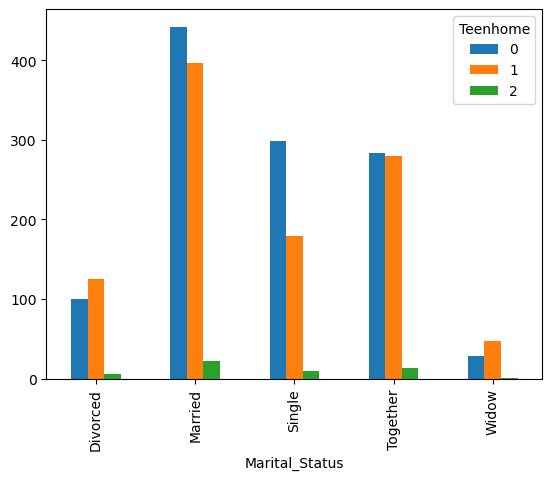

In [37]:
crosstab_data = pd.crosstab(df['Marital_Status'], df['Teenhome'])

crosstab_data.plot(kind='bar', stacked=False)

plt.show()

Observations:

**1) Negative Relationship Between Number of Kids and Income**

This suggests that as the number of children in a household increases, the household income tends to decrease. This could be attributed to various factors, such as increased expenses associated with raising children or one parent possibly working less or not at all to care for the children.

**2) Positive Correlation Between Marital Status and Income**

The data indicates that single individuals typically earn less than married or divorced individuals. This might be due to combined incomes in married households or potential economic stability and career advancement that often comes with age, as people who are married or divorced are typically older than single individuals.

**3) Positive Correlation Between Income and Education Level**

This finding is consistent with general economic trends where higher educational attainment often leads to better-paying job opportunities. As income decreases, so does the level of education, suggesting that higher education may be a key factor in achieving higher income levels.

**4) Married People More Likely to Have Kids at Home**

This could be reflective of traditional family structures where married couples are more likely to have children living with them.

**5) Married People Have More Teens at Home**

Similar to the previous observation, this could be a reflection of the life stage of married individuals. Married couples might be more likely to be in the phase of life where their children are in their teenage years, compared to single or divorced individuals.


Based on these observations, it's evident that understanding the financial challenges faced by households with more children can guide the development of pricing strategies and product offerings. Likewise, acknowledging the link between marital status, the presence of teenagers in the household, and varying income levels can be instrumental in more accurately targeting distinct demographic segments. This knowledge can be leveraged to tailor products and marketing initiatives to meet the unique needs and preferences of these groups.


### **Feature Engineering and Data Processing**

In this section, we will first prepare our dataset for analysis.
- Imputing missing values

In [38]:
# Can we extract the age of each customer and create a new feature? Yes, we can create new category called 'Age'.
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

df['Customer_Year'] = df['Dt_Customer'].dt.year

df['Age'] = df['Customer_Year'] - df['Year_Birth']



In [39]:
# Can we find the total kids and teens in the home? Yes, we can create new category called 'Total_Kids_And_Teens'.
df['Total_Kids_And_Teens']= df['Kidhome'] + df['Teenhome']


In [40]:
# Can we find out how many members each family has? Yes, we can create new category called 'Total_Members_Household'.
df['Total_Members_Household'] = df['Marital_Status'].apply(lambda x: 1 if x == 'Single' or x == 'Divorced' or x == 'Widow' else 2) + df['Total_Kids_And_Teens']

In [41]:
# Can we find the total amount spent by the customers on various products? Yes, we can create new category called 'Expenses'.
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntGoldProds'] + df['MntSweetProducts']


In [42]:
# Can we find out the total number of products purchased by the customers? Yes, we can create new category called 'TotalAcceptedCmp'.
df["NumTotalPurchases"] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] 

In [43]:
# Can we add all the campaign related variables to get the total number of accepted campaigns by a customer? Yes, we can create new category called 'NumTotalPurchases'.

df["TotalAcceptedCmp"] = df["AcceptedCmp1"] + df["AcceptedCmp2"] + df["AcceptedCmp3"] + df["AcceptedCmp4"]+ df["AcceptedCmp5"] + df["Response"]

In [44]:
df["Dt_Customer"].max()

Timestamp('2014-12-06 00:00:00')

From the above output from the max function, we observed that the last customer enrollment date is December 6th, 2014.

In [45]:
# Can we find out how long the customer has been with the company? Yes, we can create new category called 'Engaged in days'.

# Create a datetime object for a specific date in 2024 (e.g., 2024-01-01)
current_date = pd.Timestamp("01-01-2015")

# Calculating the difference in days
df["Engaged in days"] = (current_date - df["Dt_Customer"]).dt.days

In [46]:
# Can we find out amount spent per purchase? Yes, we can create new category called 'AmountPerPurchase'.
df['AmountPerPurchase'] = df["Expenses"]/ df["NumTotalPurchases"]

In [47]:
# Checking for infinite values to make sure we can scale the data. 
df['AmountPerPurchase'].max()

inf

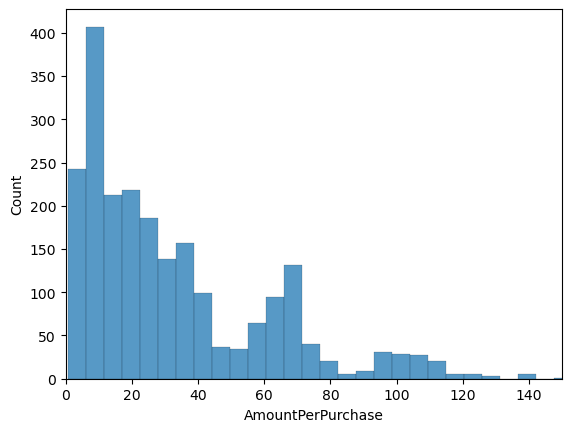

In [48]:
# Create the histogram plot and assign it to a variable
hist_plot = sns.histplot(data=df, x='AmountPerPurchase')

# Set the x-axis limits on the plot
hist_plot.set_xlim(0, 150)

# Show the plot
plt.show()

<Axes: xlabel='Expenses', ylabel='Income'>

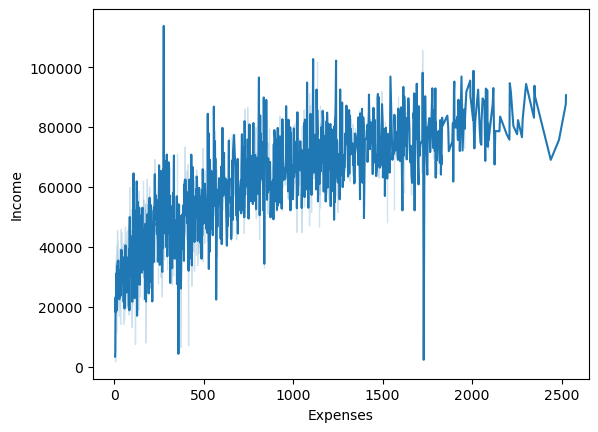

In [49]:
sns.lineplot(x='Expenses', y='Income', data=df)

<Axes: xlabel='Total_Members_Household', ylabel='Income'>

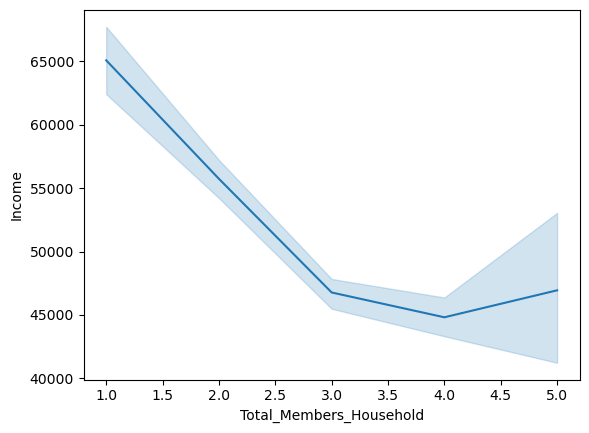

In [50]:
sns.lineplot(x='Total_Members_Household', y='Income', data=df)

**Observations:**

**1) Prevalent Price Range per Customer: $10-20**

This finding indicates that the majority of our customers prefer purchasing items within the $10-20 price range. This suggests that products priced within this bracket are likely more appealing, possibly due to their perceived value or affordability.

**2) Positive Correlation Between Expenses and Income**

This observation aligns with typical consumer behavior where individuals with higher income tend to spend more. This could be due to a higher disposable income allowing for more discretionary spending. 

**3) Negative Correlation Between Number of Family Members and Income per Individual**

As the number of family members increases, the income per individual decreases. This might reflect the economic impact of larger families, where the household income is divided among more members, potentially leading to a lower per capita income. 


## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

## **Data Preparation for Segmentation**

- The decision about which variables to use for clustering is a critically important decision that will have a big impact on the clustering solution. So we need to think carefully about the variables we will choose for clustering. Clearly, this is a step where a lot of contextual knowledge, creativity, and experimentation/iterations are needed.
- Moreover, we often use only a few of the data attributes for segmentation (the segmentation attributes) and use some of the remaining ones (the profiling attributes) only to profile the clusters. For example, in market research and market segmentation, we can use behavioral data for segmentation (to segment the customers based on their behavior like amount spent, units bought, etc.), and then use both demographic as well as behavioral data for profiling the segments found.
- Plot the correlation plot after we've removed the irrelevant variables
- Scale the Data

In [51]:
# Dropping all the irrelevant columns and storing in data_model
data_model = df.drop(
    columns=[
        "Year_Birth",
        "Dt_Customer",
        "Complain",
        "Response",
        "AcceptedCmp1",
        "AcceptedCmp2",
        "AcceptedCmp3",
        "AcceptedCmp4",
        "AcceptedCmp5",
        "Marital_Status",
        "Total_Kids_And_Teens",
        'Education',
        'Kidhome',
        'Teenhome', 'Income','Age', 'Total_Members_Household'
    ],
    axis=1,
)

In [52]:
data_model.shape

(2232, 18)

In [53]:
data_model.head()

Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0       58       635         88              546              172   
1       38        11          1                6                2   
2       26       426         49              127              111   
3       26        11          4               20               10   
4       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Customer_Year  \
0                   10                  4                  7           2012   
1                    1                  2                  5           2014   
2                    2                 10                  4           2013   
3                    0                  4                  6           2014   
4                    3                  6                  5           2014   

   Expenses  NumTotalPurchases  TotalAcceptedCmp  Engaged in days  \
0      1617                 25                 1              997   
1        27                  6                 0              151   
2       776                 21                 0              498   
3        53                  8                 0               91   
4       422                 19                 0              347   

   AmountPerPurchase  
0          64.680000  
1           4.500000  
2          36.952381  
3           6.625000  
4          22.210526

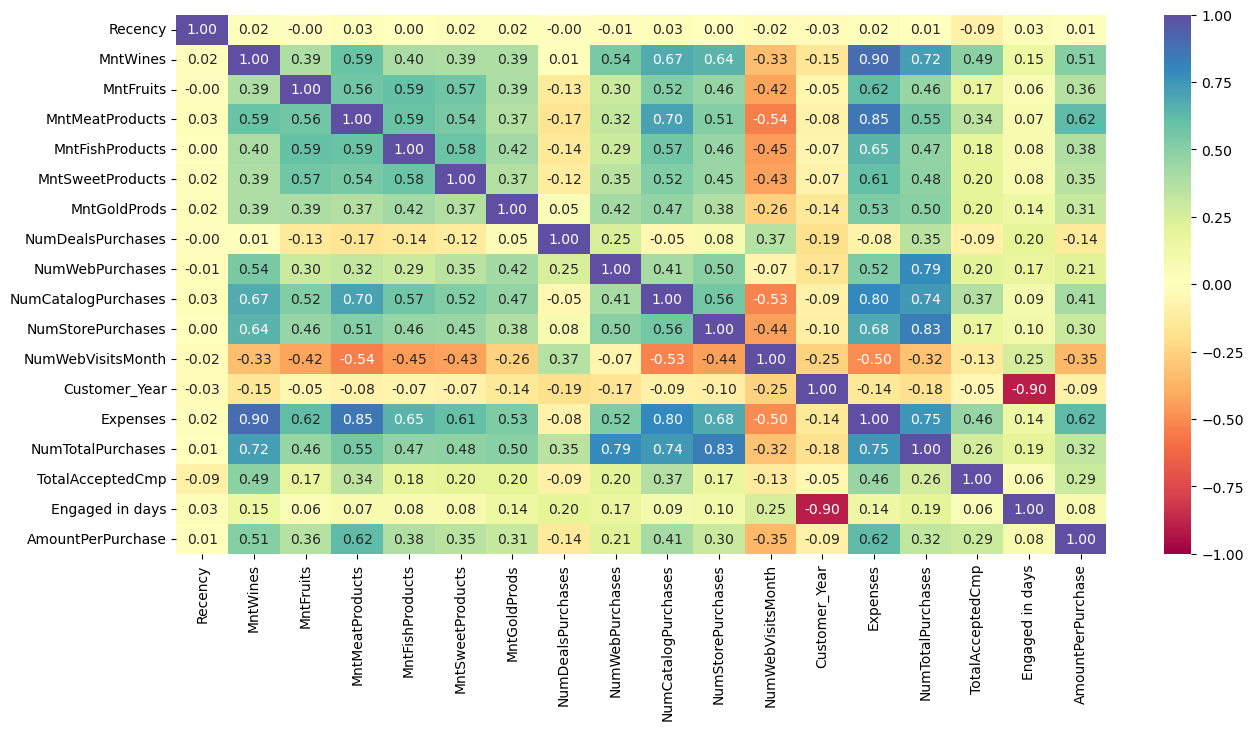

In [54]:
plt.figure(figsize=(15, 7))

correlation_matrix = data_model.corr()

sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

plt.show()

In [55]:
# Replace infinity values with NaN
data_model.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
data_model_imputed = pd.DataFrame(imputer.fit_transform(data_model), columns=data_model.columns)

# Scale the imputed data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(data_model_imputed), columns=data_model_imputed.columns)

df_scaled.head()

Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  0.307081  0.980281   1.547741         1.735476         2.457243   
1 -0.383851 -0.872949  -0.637496        -0.726318        -0.651911   
2 -0.798410  0.359568   0.568152        -0.174694         1.341605   
3 -0.798410 -0.872949  -0.562143        -0.662493        -0.505598   
4  1.550759 -0.391822   0.417446        -0.215724         0.152811   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0          1.472657      0.839843           0.359999         1.406699   
1         -0.633057     -0.731254          -0.167937        -1.116638   
2         -0.148984     -0.041504          -0.695872         1.406699   
3         -0.584649     -0.750414          -0.167937        -0.756161   
4         -0.003763     -0.558817           1.415871         0.325269   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Customer_Year  \
0             2.634319          -0.557847           0.690949      -1.501146   
1            -0.585333          -1.174850          -0.137299       1.420003   
2            -0.227594           1.293165          -0.551424      -0.040572   
3            -0.943072          -0.557847           0.276825       1.420003   
4             0.130145           0.059157          -0.137299       1.420003   

   Expenses  NumTotalPurchases  TotalAcceptedCmp  Engaged in days  \
0  1.682002           1.330482          0.620543         1.977353   
1 -0.962227          -1.162585         -0.503687        -1.666326   
2  0.283388           0.805626         -0.503687        -0.171815   
3 -0.918988          -0.900156         -0.503687        -1.924743   
4 -0.305328           0.543198         -0.503687        -0.822164   

   AmountPerPurchase  
0           0.697085  
1          -0.639441  
2           0.081288  
3          -0.592247  
4          -0.246111

In [56]:
df_scaled.shape

(2232, 18)

## **Applying T-SNE and PCA to the data to visualize the data distributed in 2 dimensions**

### **Applying T-SNE**

<Axes: xlabel='0', ylabel='1'>

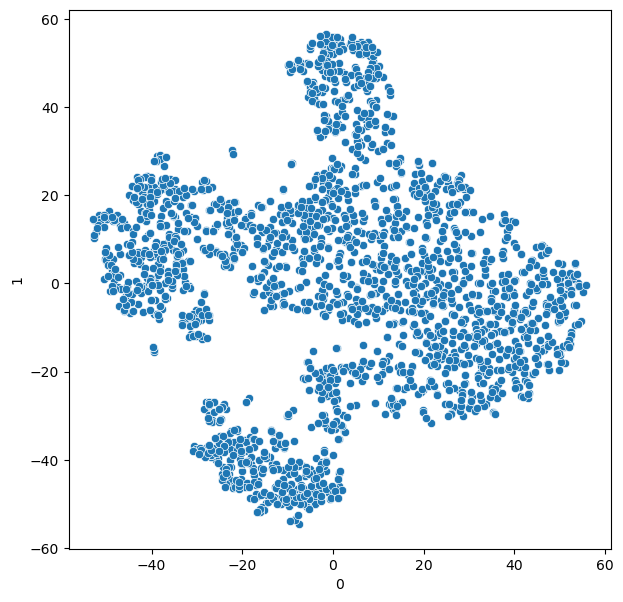

In [57]:
tsne = TSNE(n_components=2, random_state=1, perplexity=35)       # Initializing T-SNE with number of component equal to 2, random_state=1, and perplexity=35

data_air_pol_tsne = tsne.fit_transform(df_scaled)                            # fit_transform T-SNE on new data

data_air_pol_tsne = pd.DataFrame(data_air_pol_tsne, columns=[0, 1])           # Converting the embeddings to a dataframe

plt.figure(figsize=(7, 7))                                                    # Scatter plot for two components

sns.scatterplot(x=0, y=1, data=data_air_pol_tsne)                             # Plotting T-SNE

**Observation and Insights:** 

1) Data Distribution: Here, the spread is quite broad, with some areas of higher density and others more sparse.

2) No Clear Separation: While there are clusters, there isn't a clear separation between all of them, indicating overlapping features or characteristics that may exist across different groups.

 

### **Applying PCA**

**Think about it:**
- Should we apply clustering algorithms on the current data or should we apply PCA on the data before applying clustering algorithms? How would this help?

In [58]:
# Defining the number of principal components to generate
n = data_model.shape[1]                                        # Storing the number of variables in the data

pca = PCA(n_components = n, random_state=1)                                       # Initializing PCA with n_components = n and random_state=1

data_pca = pd.DataFrame(pca.fit_transform(df_scaled))                      # fit_transform PCA on the scaled data

# The percentage of variance explained by each principal component is stored
exp_var = pca.explained_variance_ratio_                    

In [59]:
exp_var

array([4.05735189e-01, 1.31557865e-01, 8.10704144e-02, 6.54129713e-02,
       5.53200796e-02, 4.10185712e-02, 3.79468270e-02, 3.44893201e-02,
       3.06124618e-02, 2.45480038e-02, 2.26085349e-02, 2.06210701e-02,
       1.77473438e-02, 1.38129057e-02, 1.22079585e-02, 5.29048459e-03,
       2.80025540e-33, 5.29482996e-34])

<Axes: xlabel='0', ylabel='1'>

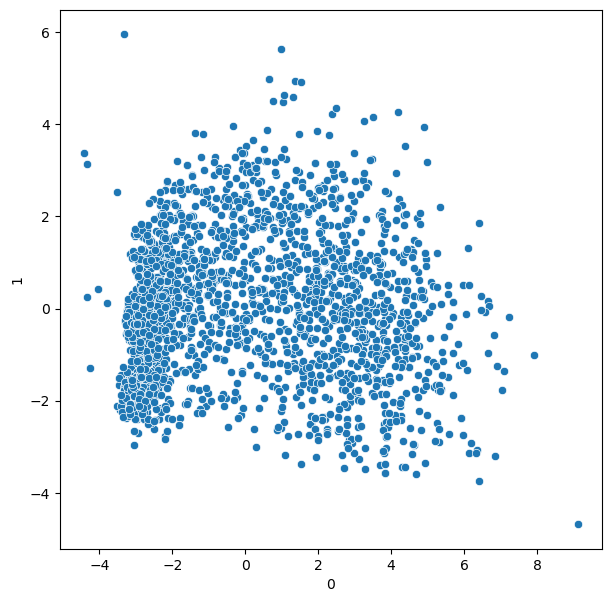

In [60]:
plt.figure(figsize=(7, 7))                                                    # Scatter plot for two components

sns.scatterplot(x=0, y=1, data=data_pca)

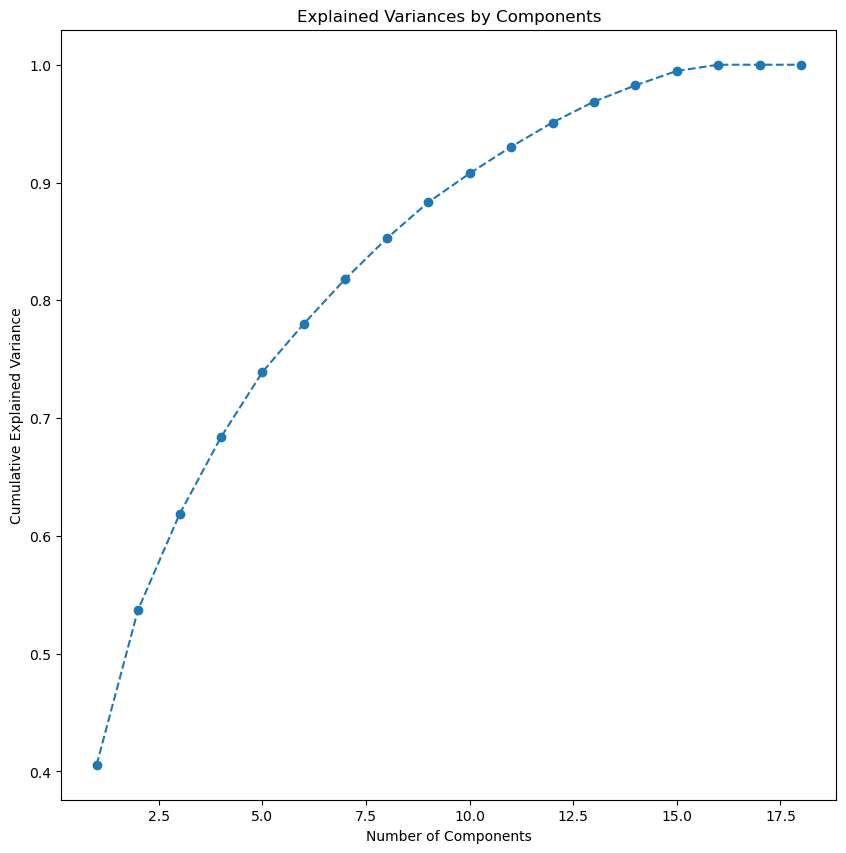

In [61]:
# Assuming exp_var is a 1D array with the explained variance for each component
# And assuming there are 18 components (the length of exp_var.cumsum())

plt.figure(figsize=(10, 10))
plt.plot(range(1, len(exp_var.cumsum()) + 1), exp_var.cumsum(), marker='o', linestyle='--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()


**Observation and Insights:**
1) Number of PCs that explain at least 90% variance: 10
2) When we compared first 2 PCA components using scatter graph, we didnt find any clusters, therefore we can proceed and try to use K-Means to find improve our PCA and find clusters.

## **K-Means** 

**Think About It:**

- How do we determine the optimal K value from the elbow curve?
- Which metric can be used to determine the final K value?

In [62]:
distortions = []                                                  # Create an empty list

K = range(2, 10)                                                  # Setting the K range from 2 to 10

for k in K:
    kmeanModel = KMeans(n_clusters=k,random_state=4)              # Initialize K-Means
    kmeanModel.fit(data_pca)                                      # Fit K-Means on the data
    distortions.append(kmeanModel.inertia_)  

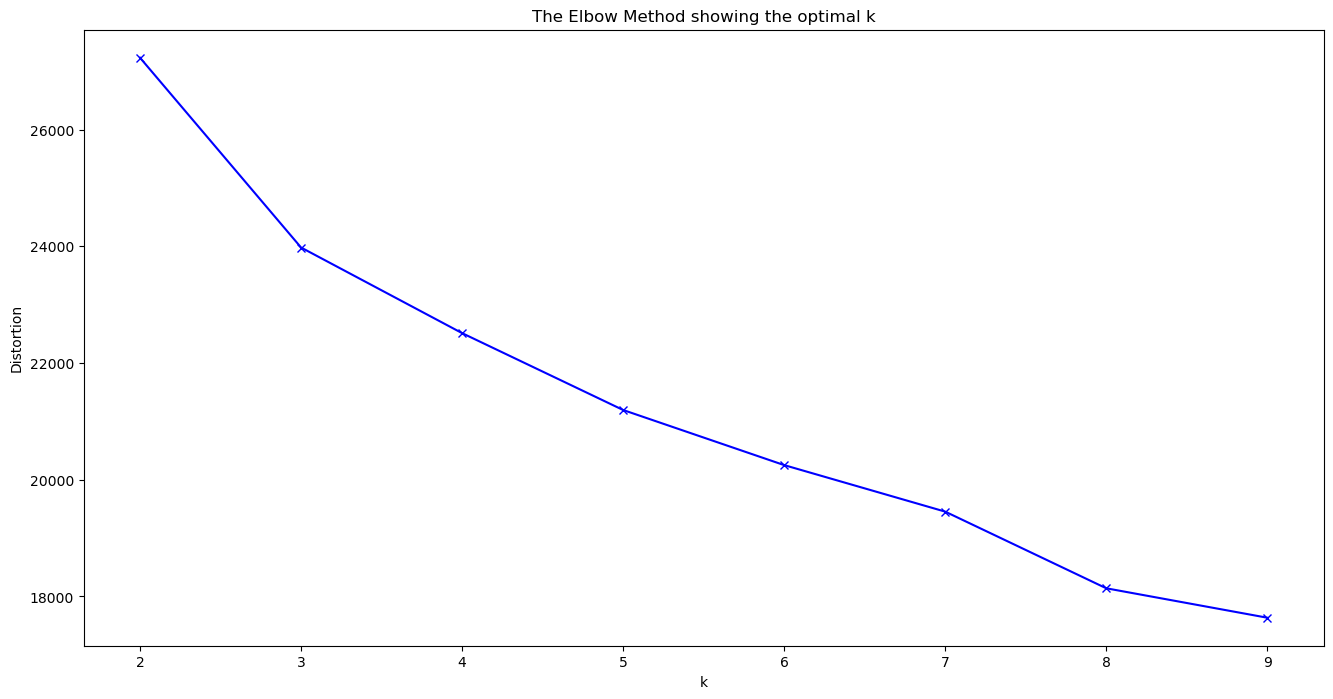

In [63]:
# Plotting the elbow plot
plt.figure(figsize=(16, 8))                                            

plt.plot(K, distortions, "bx-")                                        # Plotting the K on X-axis and distortions on y-axis

plt.xlabel("k")                                                        

plt.ylabel("Distortion")                                               

plt.title("The Elbow Method showing the optimal k")                    
plt.show()

**Observation:**
From your graph, it seems the "elbow" could be at the point where k equals 3 or 4, as the slope of the line changes more subtly beyond this point. This suggests that increasing the number of clusters beyond 3 or 4 results in smaller gains in terms of decreasing the WCSS.

In [64]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_score = []  # Creating empty list
cluster_list = range(2, 10)  # Creating a range from 3 to 7

for n_clusters in cluster_list:
    
    # Initializing K-Means with number of clusters equal to n_clusters and random_state=1
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    
    # Fitting and predicting on the pca data (replace 'pca_data' with your actual data variable)
    preds = clusterer.fit_predict(data_pca)
    
    # Calculating silhouette score - Hint: Use silhouette_score() function
    score = silhouette_score(data_pca, preds)
    
    # Appending silhouette score to empty list created above
    sil_score.append(score)
    
    # Printing the silhouette score
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.33227091787716)
For n_clusters = 3, the silhouette score is 0.2522949107056445)
For n_clusters = 4, the silhouette score is 0.16031063012613214)
For n_clusters = 5, the silhouette score is 0.15980684260381864)
For n_clusters = 6, the silhouette score is 0.16202462437470022)
For n_clusters = 7, the silhouette score is 0.19065136540334843)
For n_clusters = 8, the silhouette score is 0.1551385873243525)
For n_clusters = 9, the silhouette score is 0.15404014776217526)


### **Applying KMeans on the PCA data and visualize the clusters**

0    1043
2     620
1     569
Name: K_means_segments_3, dtype: int64


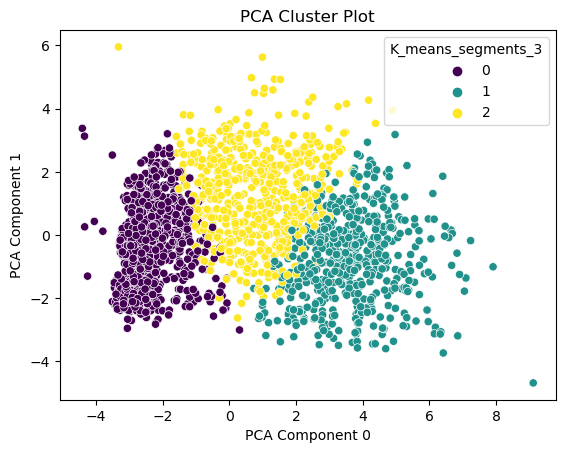

In [65]:
# Converting all column names in data_pca to strings
data_pca.columns = data_pca.columns.astype(str)

# Applying K-Means on data_pca
kmeans = KMeans(n_clusters=3, random_state=1)

# Fitting on the data_pca
kmeans.fit(data_pca)

# Adding K-Means cluster labels to the data_pca data
data_pca['K_means_segments_3'] = kmeans.labels_

# Adding labels
df['K_means_segments_3'] = kmeans.labels_
data_model['K_means_segments_3'] = kmeans.labels_

# Checking the distribution
print(data_model['K_means_segments_3'].value_counts())

# Visualizing the clusters using PCA
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=PCA.iloc[:, X], y=PCA.iloc[:, Y], hue=PCA[cluster], palette='viridis')
    plt.xlabel(f'PCA Component {X}')
    plt.ylabel(f'PCA Component {Y}')
    plt.title('PCA Cluster Plot')

PCA_PLOT(0, 1, data_pca, 'K_means_segments_3')

### **Cluster Profiling**

In [66]:
# Grouping 'data' by 'K_means_segments_3' and finding the mean for each cluster
cluster_profile_KMeans_3 = df.groupby('K_means_segments_3').mean()
cluster_profile_KMeans_3

Year_Birth        Income   Kidhome  Teenhome    Recency  \
K_means_segments_3                                                             
0                   1970.880153  35301.795079  0.750719  0.474593  49.065197   
1                   1967.929701  75874.344915  0.035149  0.216169  50.722320   
2                   1966.072581  56885.052432  0.304839  0.829032  47.709677   

                      MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
K_means_segments_3                                                            
0                    44.092042   5.020134        23.138063         7.094919   
1                   633.182777  69.546573       457.168717       102.117750   
2                   442.475806  22.698387       136.662903        29.867742   

                    MntSweetProducts  ...  Response  Customer_Year        Age  \
K_means_segments_3                    ...                                       
0                           5.009588  ...  0.081496    2013.172579  42.292426   
1                          70.850615  ...  0.286467    2013.024605  45.094903   
2                          24.309677  ...  0.138710    2012.787097  46.714516   

                    Total_Kids_And_Teens  Total_Members_Household  \
K_means_segments_3                                                  
0                               1.225312                 2.878236   
1                               0.251318                 1.873462   
2                               1.133871                 2.782258   

                       Expenses  NumTotalPurchases  TotalAcceptedCmp  \
K_means_segments_3                                                     
0                     99.358581           7.906999          0.165868   
1                   1412.012302          20.868190          1.012302   
2                    717.137097          21.043548          0.404839   

                    Engaged in days  AmountPerPurchase  
K_means_segments_3                                      
0                        490.136146                NaN  
1                        540.411248          73.092381  
2                        615.919355          33.824325  

[3 rows x 32 columns]

In [67]:
# Highlighting the maximum average value among all the clusters for each of the variables
cluster_profile_KMeans_3.style.highlight_max(color="lightgreen", axis=0)


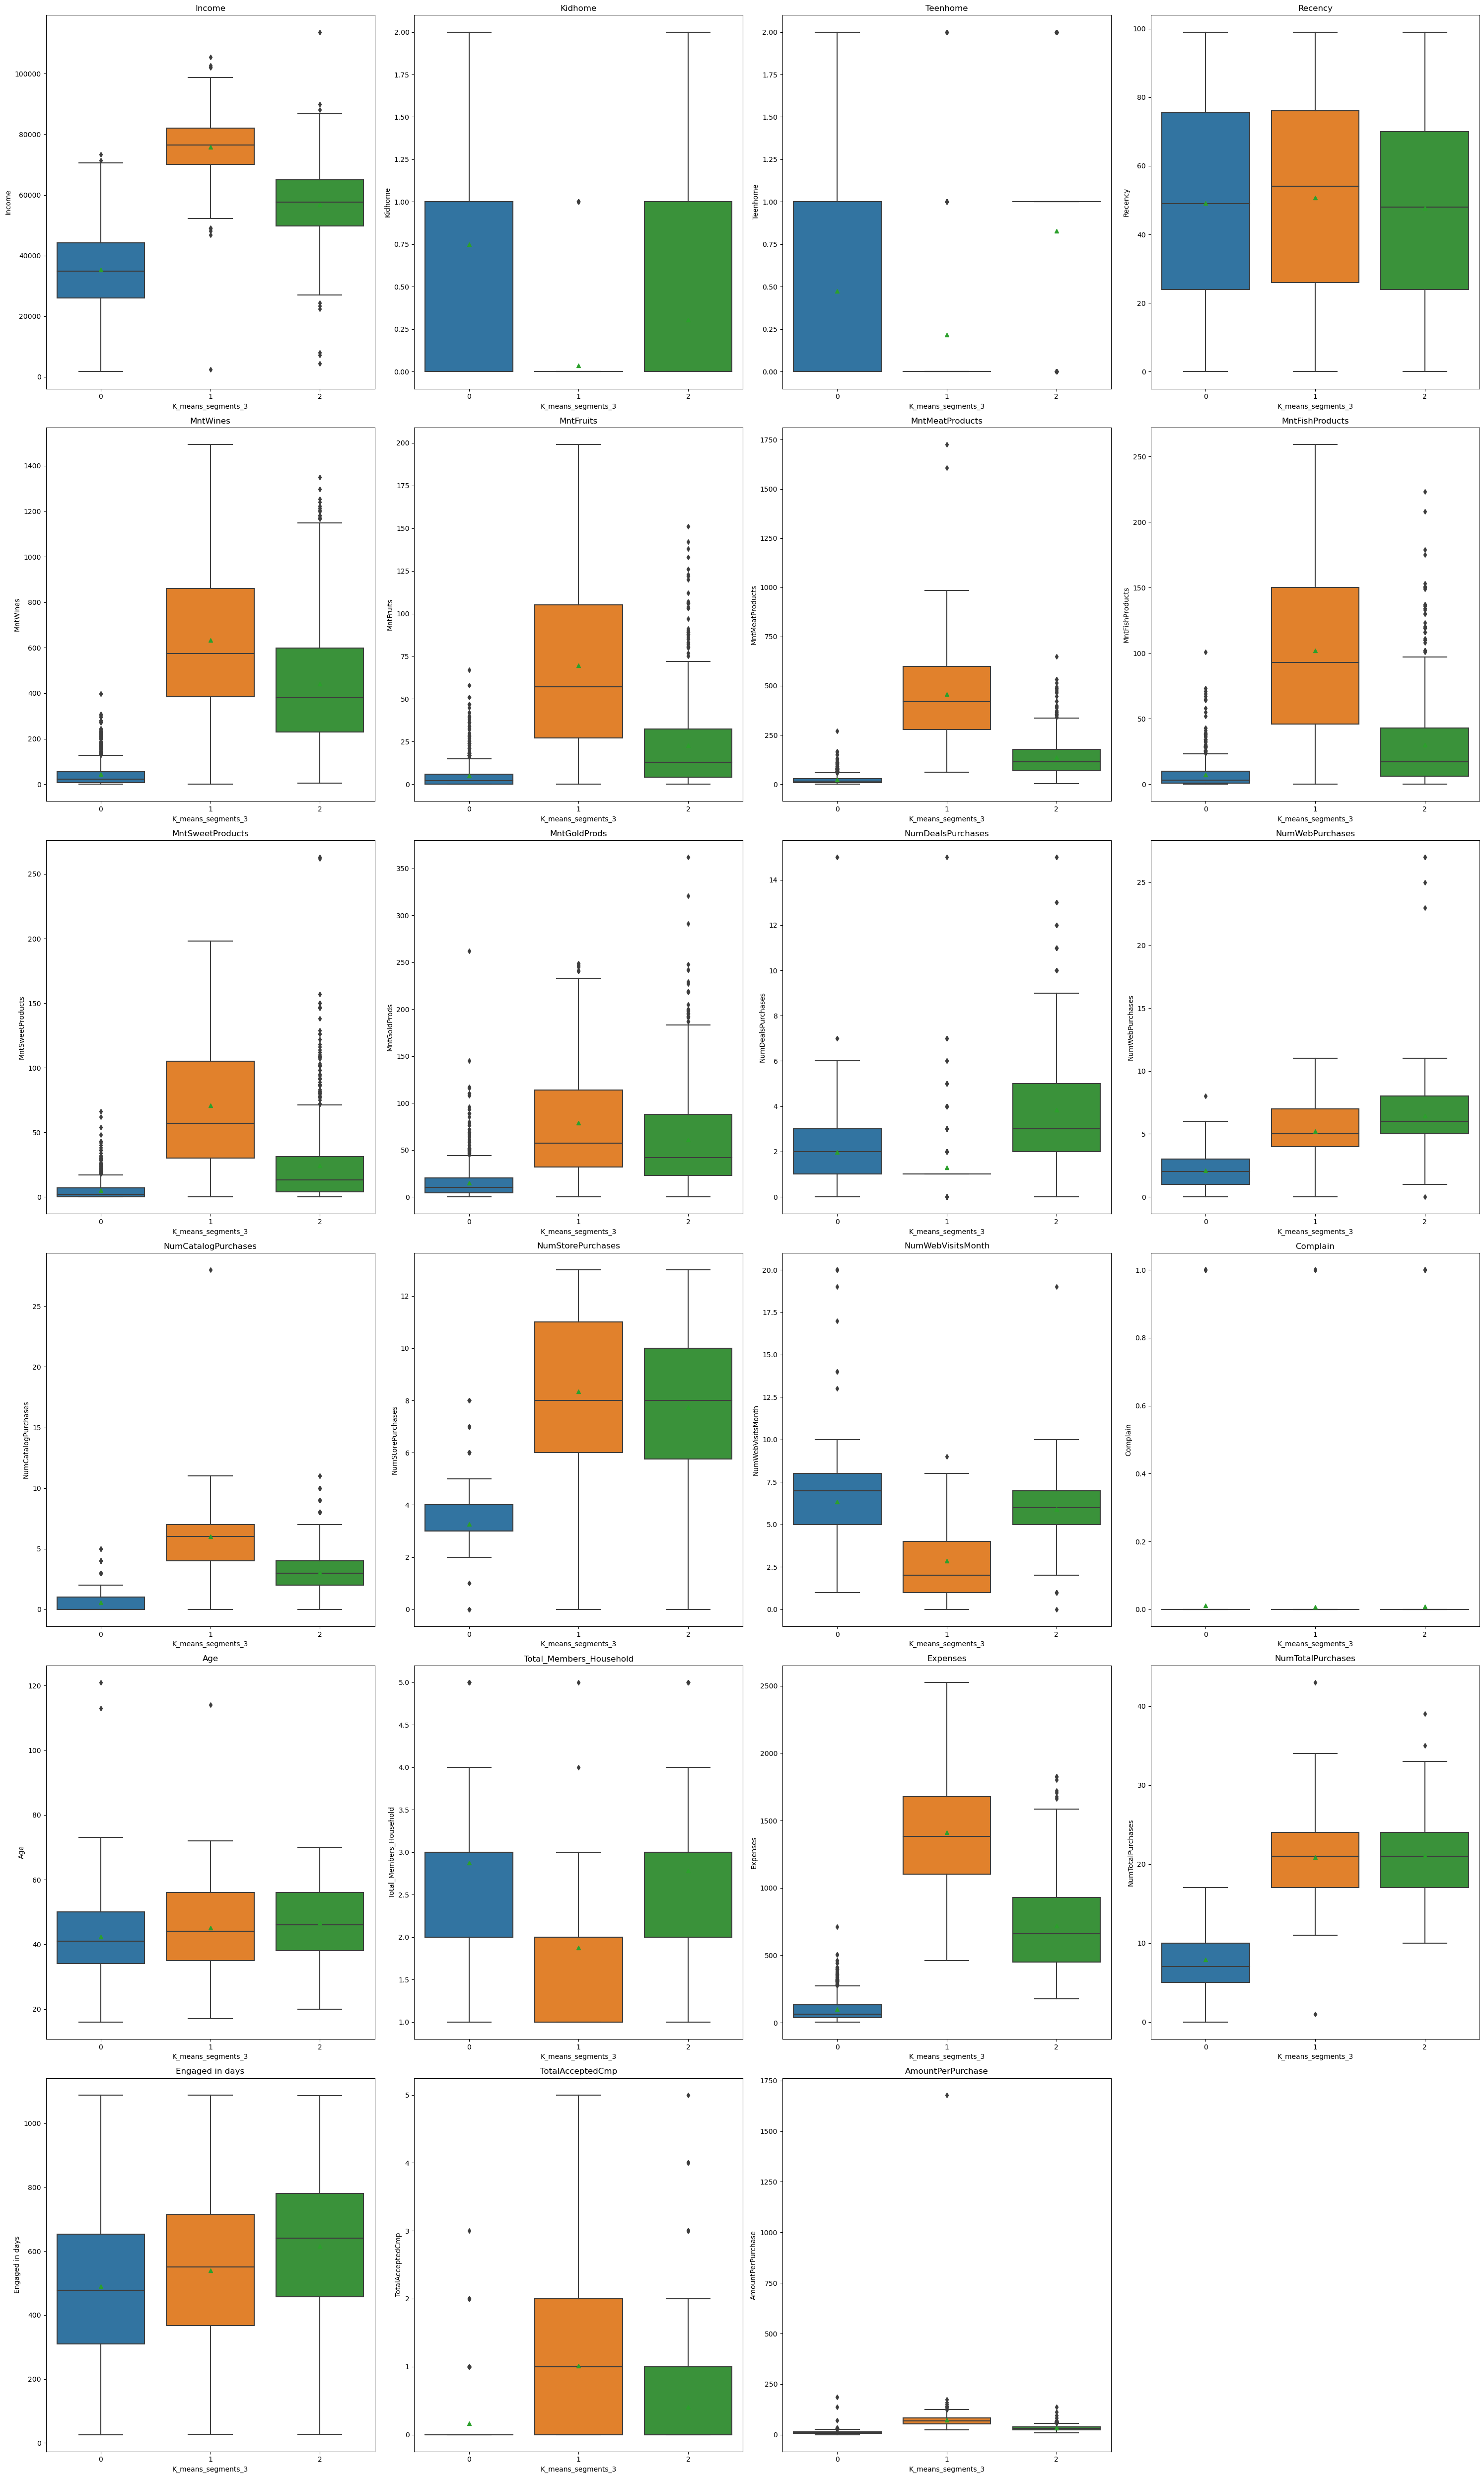

In [68]:
# Columns to use in boxplot
col_for_box = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Age', 'Total_Members_Household', 'Expenses', 'NumTotalPurchases', 'Engaged in days', 'TotalAcceptedCmp', 'AmountPerPurchase']

# Creating boxplot for each of the variables
plt.figure(figsize=(30, 50))

for i, variable in enumerate(col_for_box):
    plt.subplot(6, 4, i + 1)
    
    # Creating the boxplot
    sns.boxplot(y=df[variable], x=df['K_means_segments_3'], showmeans=True)
    
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations and Insights:** 

**1) Income:**

Cluster 0 has the lowest median income, whereas Cluster 1 has the highest median income. Cluster 2 falls in between. There are outliers in Clusters 1 and 2, indicating some individuals with significantly higher incomes than the rest of their cluster.

**2) Recency:** 

This measure typically refers to the recency of a customer's last purchase. All clusters have a similar median recency, but Cluster 0 has the broadest interquartile range (IQR), suggesting more variability in the time since their last purchase.

**3) MntWines (Amount spent on Wines):**

Cluster 1 has the highest median amount spent on wines, while Cluster 0 has the lowest. This suggests that Cluster 1 might contain more wine enthusiasts or customers with a preference for wines.

**4) MntFruits (Amount spent on Fruits):** 

Similar to MntWines, Cluster 1 spends more on fruits compared to Clusters 0 and 2. The spending on fruits is the least for Cluster 0.

**5) MntMeatProducts (Amount spent on Meat Products):** 

Cluster 1 again shows the highest median expenditure on meat products, while Cluster 0 spends the least.

**6) MntFishProducts (Amount spent on Fish Products):**

Cluster 1 is the top spender on fish products, followed by Cluster 2, and then Cluster 0.

**7) Kidhome and Teenhome (Number of kids and teens at home):** 

These boxplots show the distribution of the number of kids and teens in the households of each cluster. It looks like Cluster 2 has households with the highest number of kids and teens on average, while Cluster 1 has the lowest.

**8) MntSweetProducts (Amount spent on sweet products):** 

Cluster 1 has the highest median expenditure on sweet products, while Cluster 0 has the lowest. This suggests that Cluster 1 has a preference for sweets or a higher disposable income to spend on such products.

**9) MntGoldProds (Amount spent on gold products):** 

Again, Cluster 1 is the top spender in this category, while Cluster 0 spends the least. This aligns with the previous observation that Cluster 1 might have more disposable income.

**10) NumDealsPurchases (Number of purchases made with a deal):** 

Cluster 0 shows the highest median number of deal purchases, indicating that this cluster is more deal-sensitive or price-conscious. Cluster 1 has the least, which may further suggest that they are less sensitive to price and more driven by product choice.

**11) NumWebPurchases (Number of purchases made through the company’s website):** 

Cluster 1 has made more purchases on the website than the other clusters, indicating higher engagement through digital channels.

**12) NumCatalogPurchases (Number of purchases made using a catalog):** 

Cluster 1 leads in catalog shopping as well, which could suggest they respond well to direct marketing or prefer shopping from catalogs.

**13) NumStorePurchases (Number of purchases made directly in stores):** 

Cluster 2 shows the highest median number of store purchases, indicating that this cluster prefers in-person shopping.

**14) NumWebVisitsMonth (Number of visits to company’s website in a month):** 

Cluster 0 has the highest median website visits, which is interesting given their high number of deal purchases — they may be frequently checking the website for deals.

**15) Complain (Number of complaints made):** 

The data suggests that complaints are low across all clusters, with Cluster 0 having a slightly higher median, although the difference is marginal.

**16) Age:** 

Cluster 1 has the highest median age, followed by Cluster 2 and then Cluster 0. This suggests that Cluster 1 may consist of older individuals, while Cluster 0 is likely younger.

**17) Total_Members_Household:** 

This metric shows the number of people in a household. Cluster 2 has the highest median, indicating larger households, while Cluster 0 has the smallest households on average.

**18) Expenses:** 

Cluster 1 has the highest median expenses, which could correlate with the older age demographic having higher spending power. Cluster 0 has the lowest, which might reflect the lower income or spending capacity of younger individuals.

**19) NumTotalPurchases:** 

Cluster 1 again shows the highest median number of total purchases, suggesting that the older demographic is purchasing more frequently. Cluster 0, with presumably younger members, has the fewest purchases.

**20) Engaged_in_days:** 

This could refer to the number of days since the customers last engaged with the company. Cluster 0 has the longest engagement period, while Cluster 2 has the shortest. This suggests that Cluster 0 may have less frequent engagement, while Cluster 2 engages more regularly.

**21) TotalAcceptedCmp:** 

This likely refers to the total number of accepted marketing campaigns. Cluster 1 has the highest median acceptance, indicating that they are more responsive to marketing efforts, whereas Cluster 0 is the least responsive.

**22) AmountPerPurchase:** 

Cluster 1 spends the most per purchase, again suggesting higher spending power or a preference for more expensive products. Cluster 0 spends the least, which might be indicative of a more budget-conscious or price-sensitive segment.

### **Describe the characteristics of each cluster**

**Think About It:**
**- Are the K-Means profiles providing any deep insights into customer purchasing behavior or which channels they are using?**

Yes, K-Means provide very valuable insight into customer purchasing behaviour and which channels are the most popular among them.

**- What is the next step to get more meaningful insights?** 

The next step is to use another clustering model and compare the results between them in our conclution. 

**Summary of each cluster:** 

**1) Cluster 0: Young, Price-Conscious Segment**

Youngest group with the lowest median age.
Lowest median income and least amount spent across most product categories.
More likely to purchase items on deal, indicating price sensitivity.
Highest number of website visits per month, suggesting they may be actively looking for deals or promotions.
Smallest household size, which may contribute to lower overall expenses.
Least engaged with marketing campaigns.
Overall, this cluster appears to consist of younger, budget-conscious individuals who are active online but spend less per purchase and are less responsive to marketing campaigns.


**2) Cluster 1: Mature, Affluent Consumers**

Oldest group with the highest median age.
Highest median income and highest spending across almost all product categories, including wines, fruits, meats, sweets, and gold products.
Least likely to purchase items on deal, suggesting lower price sensitivity.
Most engaged with marketing campaigns.
Tends to make purchases through catalogs and websites, indicating comfort with direct marketing and online shopping.
Overall, Cluster 1 seems to represent more mature, affluent consumers who are engaged shoppers with a preference for premium products and a higher likelihood of responding to marketing efforts.



**3) Cluster 2: Family-Oriented, Frequent Shoppers**

Middle range for age, falling between Clusters 0 and 1.
Median income and expenses fall between Clusters 0 and 1.
Largest household size, likely indicating families with children or multi-generational homes.
Shows the highest median number of store purchases, suggesting a preference for in-store shopping experiences.
Engages more regularly with the company, as indicated by the shortest engagement days.
Middle range for responsiveness to marketing campaigns.
Overall, Cluster 2 appears to consist of family-oriented customers with moderate income, who frequently shop in-store and have a relatively regular engagement with the company.



**Conclusion:**
Cluster 0 might be targeted with digital marketing campaigns offering deals and promotions. Cluster 1 could be the focus of premium product offerings and loyalty programs. Cluster 2 might be receptive to family deals, in-store promotions, and products that appeal to larger households.

## **K-Medoids**

In [69]:
kmedoids = KMedoids(n_clusters=3, random_state=1)

# Fitting and predicting K-Medoids using data_pca
preds = kmedoids.fit_predict(data_pca)

# Calculating the silhouette score
score = silhouette_score(data_pca, preds)


print(score)

0.20169342922138522


### **Visualize the clusters using PCA**

In [70]:
# Adding K-Medoids cluster labels to the whole data
df['K_Medoids_Clusters'] = preds

# Adding K-Medoids cluster labels to data_model
data_model['K_Medoids_Clusters'] = preds

# Adding K-Medoids cluster labels to data_pca
data_pca['K_Medoids_Clusters'] = preds

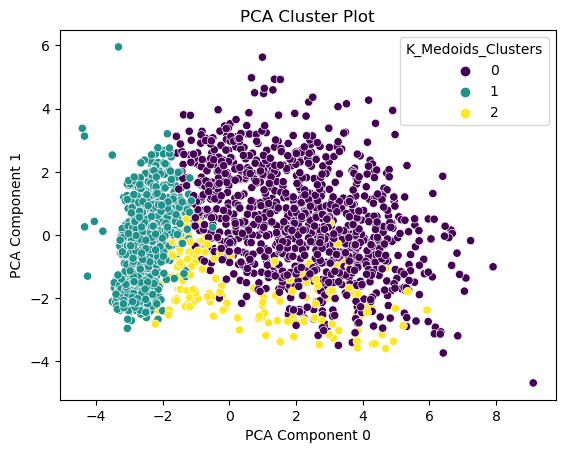

In [71]:
def PCA_PLOT(X, Y, PCA, cluster):
    sns.scatterplot(x=PCA.iloc[:, X], y=PCA.iloc[:, Y], hue=PCA[cluster], palette='viridis')
    plt.xlabel(f'PCA Component {X}')
    plt.ylabel(f'PCA Component {Y}')
    plt.title('PCA Cluster Plot')

PCA_PLOT(0, 1, data_pca, 'K_Medoids_Clusters')

### **Cluster Profiling**

In [72]:
cluster_means4 = df.groupby('K_Medoids_Clusters').mean()

# Displaying the cluster-wise means
print(cluster_means4)

                     Year_Birth        Income   Kidhome  Teenhome    Recency  \
K_Medoids_Clusters                                                             
0                   1966.855576  65268.704538  0.188300  0.566728  49.858318   
1                   1971.237945  33544.690529  0.795597  0.460168  49.477987   
2                   1967.630435  64431.573384  0.146739  0.396739  42.766304   

                      MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
K_Medoids_Clusters                                                            
0                   547.868373  39.699269       287.408592        60.008227   
1                    35.518868   4.035639        19.293501         5.741090   
2                   257.342391  63.043478       196.532609        70.092391   

                    MntSweetProducts  ...  Customer_Year        Age  \
K_Medoids_Clusters                    ...                             
0                          43.021938  ...    2012.844607  45.

In [73]:
# Highlighting the maximum average value among all the clusters for each of the variables
cluster_means4.style.highlight_max(color="lightgreen", axis=0)


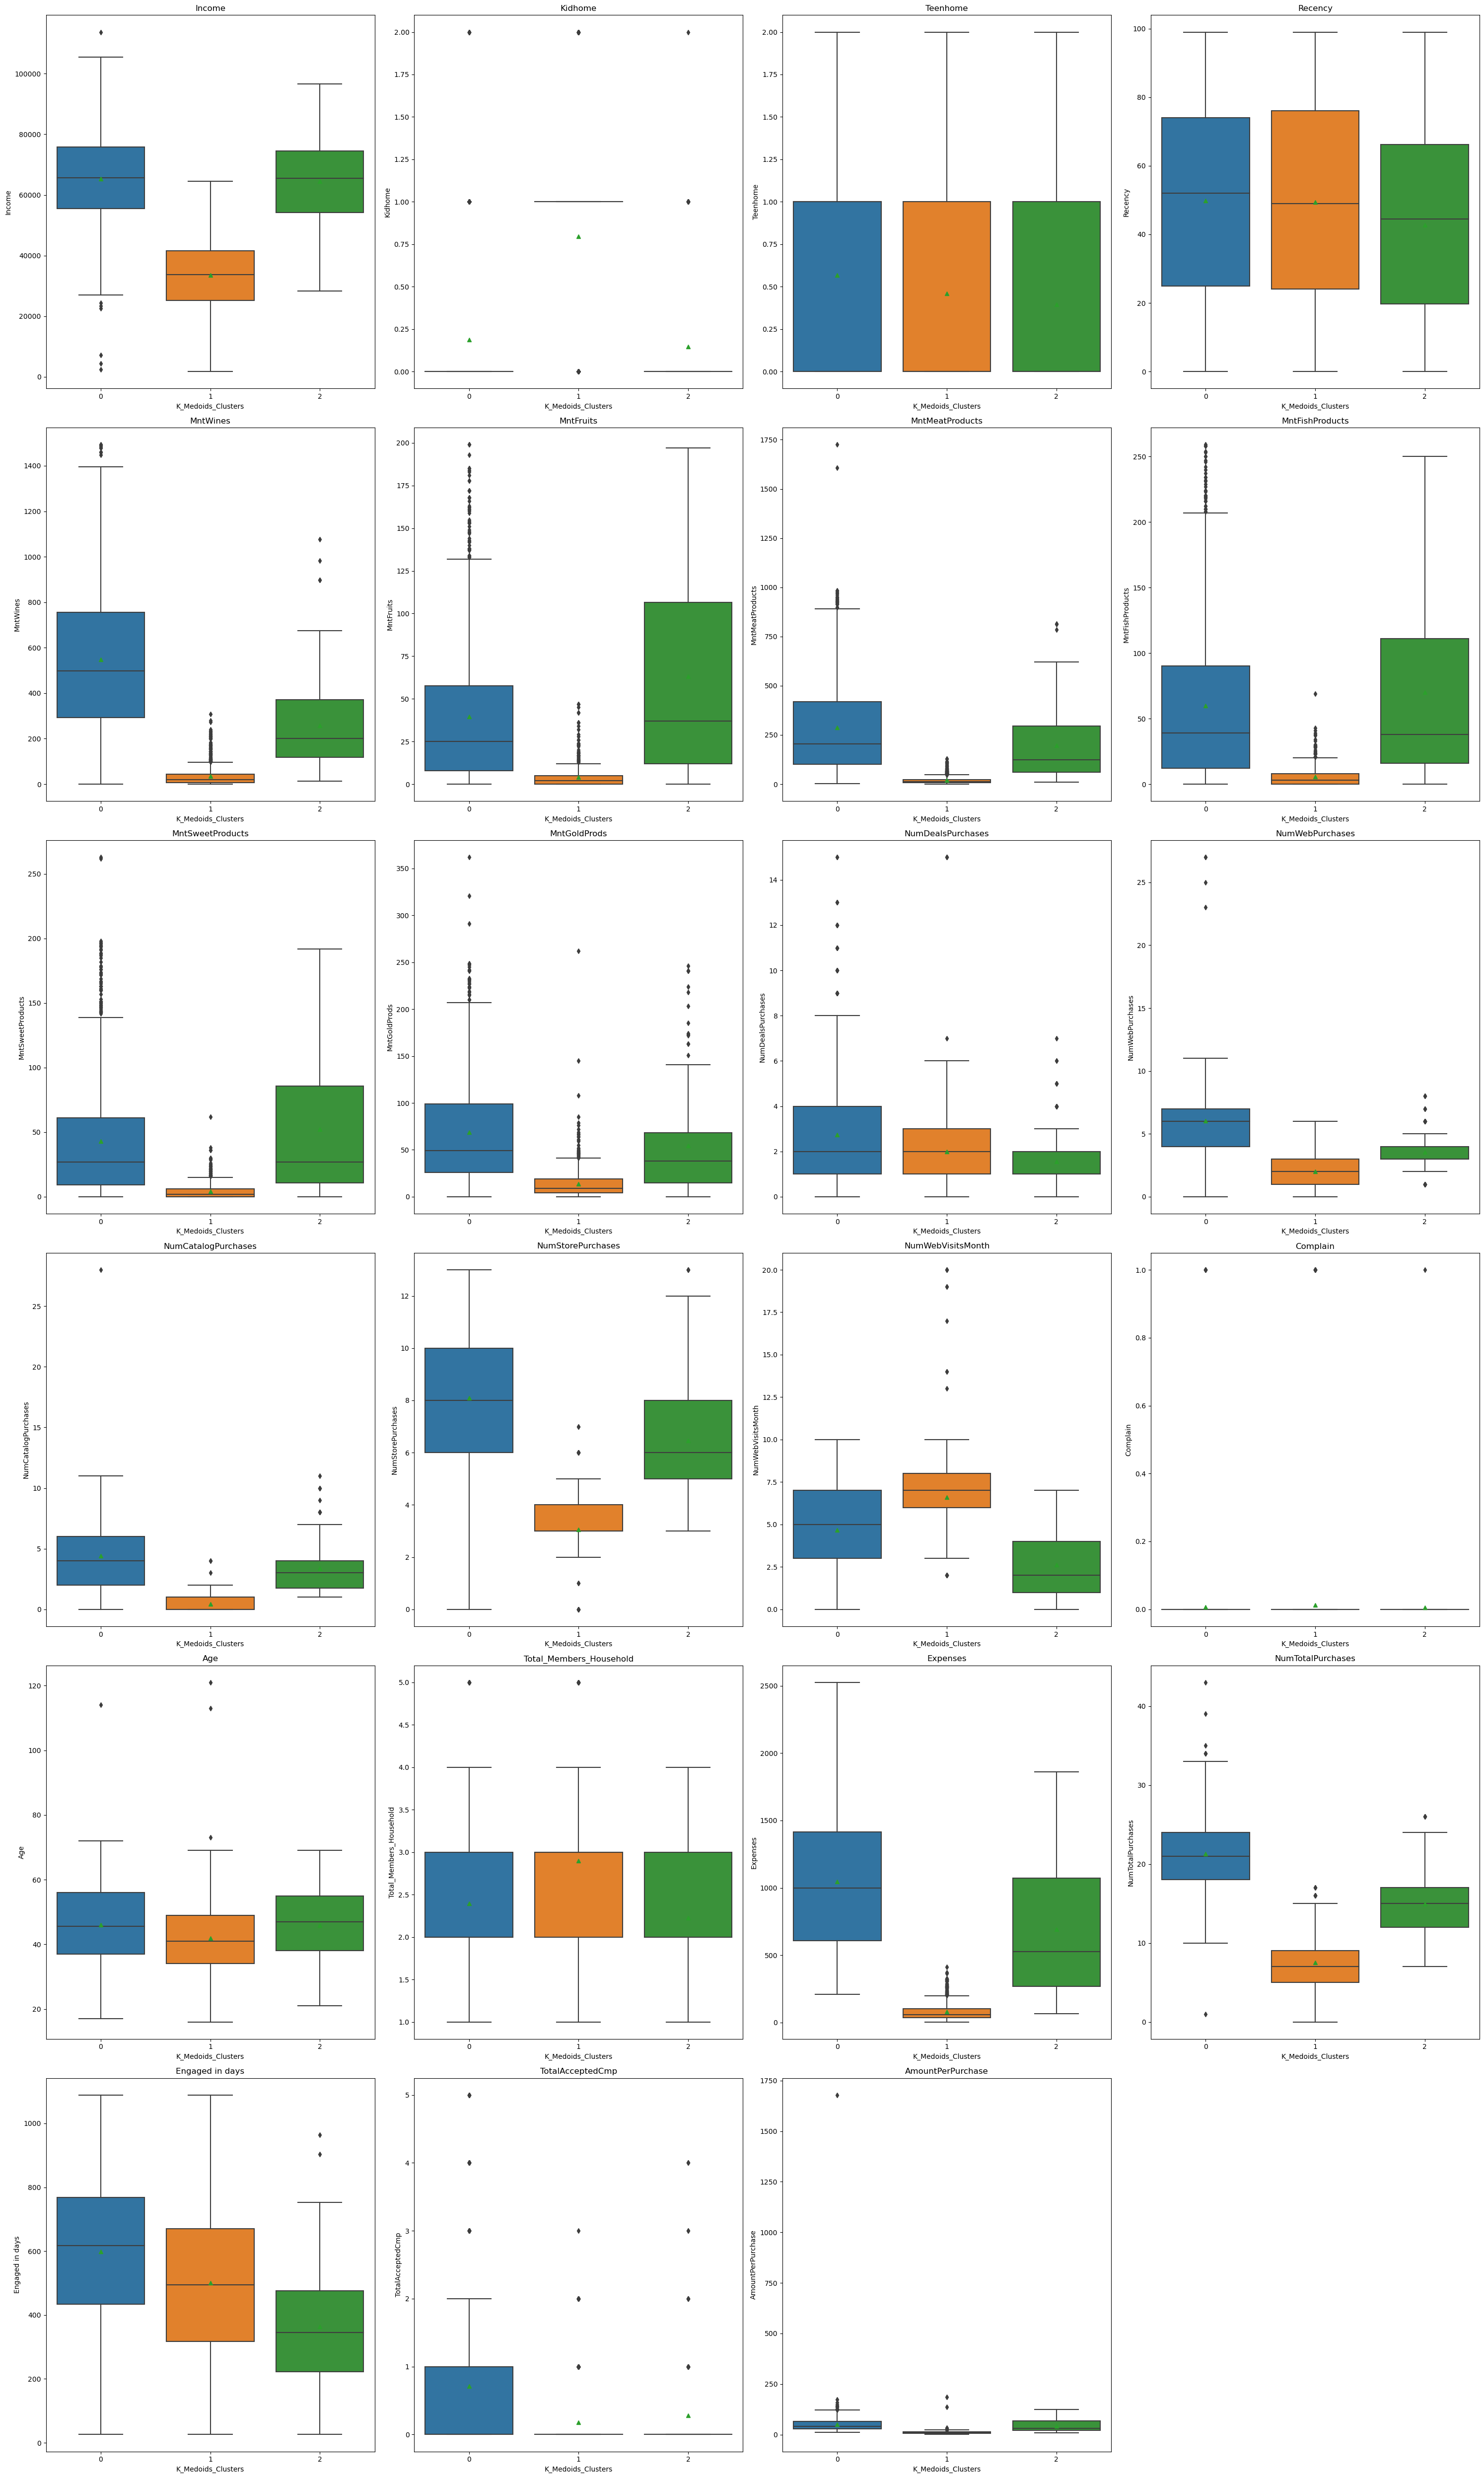

In [74]:
# Columns to use in boxplot
col_for_box = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Age', 'Total_Members_Household', 'Expenses', 'NumTotalPurchases', 'Engaged in days', 'TotalAcceptedCmp', 'AmountPerPurchase']

# Creating boxplot for each of the variables
plt.figure(figsize=(30, 50))

for i, variable in enumerate(col_for_box):
    plt.subplot(6, 4, i + 1)
    
    # Creating the boxplot
    sns.boxplot(y=df[variable], x=df['K_Medoids_Clusters'], showmeans=True)
    
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations and Insights:** 

**1) Income:** 

Cluster 1 has the highest median income, which is notably higher than that of Clusters 0 and 2. The distribution of income in Cluster 1 also has outliers indicating some very high-income individuals. Cluster 0 has the lowest median income.

**2) Kidhome:**

The number of kids at home in Cluster 2 is significantly higher than in Clusters 0 and 1, with Cluster 0 having the lowest median value.

**3) Teenhome:**

The median number of teens at home is highest in Cluster 1, followed by Cluster 2, and is lowest in Cluster 0. This indicates that Cluster 1 might consist of families with older children.

**4) Recency:** 

The median recency of purchases is similar across all clusters, with Cluster 2 having a slightly lower median, which may suggest a slightly more recent interaction with the company's products or services.

**5) MntWines:** 

The amount spent on wines is highest in Cluster 1, suggesting a preference or greater financial ability to spend on wines. Cluster 0 spends the least on wines.

**6) MntFruits:** 

Cluster 1 again shows the highest spending on fruits, indicating either a preference for healthier options or the ability to spend on such items. Cluster 0 has the lowest median spending on fruits.

**7) MntMeatProducts:** 

Spending on meat products is also highest in Cluster 1, while Cluster 0 has the lowest spending, which is consistent with the income levels.

**8) MntFishProducts:** 

Cluster 1 spends the most on fish products, with Cluster 0 spending the least. This suggests a similar trend to meat and fruits, potentially linked to income.

**9) MntSweetProducts (Amount spent on sweet products):** 

Cluster 2 spends the most on sweet products, with Cluster 0 spending the least. This suggests Cluster 2 has a strong preference for sweets or more discretionary spending in this category.

**10) MntGoldProds (Amount spent on gold products):** 

Cluster 2 again shows the highest spending on gold products, indicating that this cluster might have more luxurious spending habits or a higher income. Cluster 0, on the other hand, spends the least.

**11) NumDealsPurchases (Number of purchases made with a deal):** 

Cluster 0 has the highest median number of purchases made with a deal, suggesting that this group is more price-sensitive or bargain-seeking. Clusters 1 and 2 are less inclined to make deal-based purchases.

**12) NumWebPurchases (Number of purchases made through the company’s website):** 

Cluster 2 makes the most purchases online, suggesting they are the most engaged with digital shopping platforms. Cluster 0 has the lowest median here, indicating less engagement online.

**13) NumCatalogPurchases (Number of purchases made using a catalog):** 

Cluster 2 also leads in catalog shopping, suggesting they are responsive to direct marketing or prefer the convenience of shopping from catalogs. Cluster 0 again has the lowest median in this category.

**14) NumStorePurchases (Number of purchases made directly in stores):** 

Cluster 2 has the highest median number of store purchases, indicating a preference for or greater access to in-person shopping. Cluster 0 has the least store purchases.

**15) NumWebVisitsMonth (Number of visits to company’s website in a month):** 

Cluster 0 visits the company's website most frequently, which is interesting given their higher number of deal purchases — suggesting they may be looking for deals or promotions.

**16) Complain (Number of complaints made):**

Complaints are low across all clusters, but Cluster 0 has a slightly higher median number of complaints compared to Clusters 1 and 2, which may indicate some level of dissatisfaction or higher expectations from the company.

**17) Age:** 

Cluster 0 has the lowest median age, suggesting it contains younger individuals. Cluster 1 has the highest median age, indicating it comprises older individuals. Cluster 2 is in between.

**18) Total_Members_Household:** 

This likely indicates the number of individuals in a household. Cluster 2 has the highest median, suggesting it includes larger households. Cluster 0 has the lowest median, indicating smaller households.

**19) Expenses:** 

Cluster 2 has the highest median expenses, which could correlate with the larger household size. Cluster 0 has the lowest, which might reflect the lower expenses of younger or smaller households.

**20) NumTotalPurchases:**

Cluster 2 has the highest median number of total purchases, which could be linked to larger household needs. Cluster 0 has the lowest, aligning with the younger age and smaller household size.

**21) Engaged_in_days:** 

This could refer to how recently the customers engaged with the company. Cluster 0 has the longest median engagement period, while Cluster 2 has the shortest, suggesting more frequent engagement.

**22) TotalAcceptedCmp:** 

This likely refers to the total number of accepted marketing campaigns. Cluster 1 has the highest median acceptance, which could suggest that older individuals in this cluster are more responsive to marketing efforts. Cluster 0 is the least responsive.

**23) AmountPerPurchase:** 

Cluster 2 spends the most per purchase, indicating higher per-transaction spending, possibly due to the need to provide for larger households. Cluster 0 spends the least per purchase.

### **Characteristics of each cluster**

**Summary for each cluster:** 

**Cluster 0: Young, Price-Sensitive Digital Navigators**

Youngest cluster with smaller household sizes.
Lowest income and spends the least across various categories, particularly on premium products like wines, meats, and fruits.
Most price-sensitive, with a higher number of purchases made with deals.
Highest frequency of website visits, which could indicate a search for offers or online window shopping.
Least responsive to marketing campaigns and spends the least per purchase, reflecting a more cautious or constrained spending behavior.
Slightly more complaints, potentially indicating higher customer service expectations or a greater reaction to dissatisfaction.


**Cluster 1: Mature, Affluent Traditionalists**

Oldest cluster with the highest income.
Spends the most on premium products, suggesting refined tastes and higher purchasing power.
Lowest number of children at home but a higher number of teens, indicating families with older children.
Most responsive to marketing campaigns, reflecting a potential preference for traditional marketing approaches and brand loyalty.
Engages less frequently with the company compared to Cluster 2, suggesting less frequent but higher quality engagement.
Moderate number of total purchases and expenses, likely due to selective purchasing habits.


**Cluster 2: Busy, Family-Oriented Consumers**

Middle-aged with the largest households, potentially indicating families with both young children and teens.
Engages more frequently with the company, has the most total purchases, and the highest expenses, which may relate to the demands of larger family sizes.
Spends the most per purchase, indicating a willingness to invest in quality or bulk buying for the household.
Highest spending on sweet and gold products, which could suggest a tendency towards discretionary spending for family treats or gifts.
Predominantly shops in-store and through catalogs, potentially valuing the physical shopping experience and convenience.
Moderately responsive to marketing campaigns and has a moderate level of complaints.

**Observations and Insights:**

The core characteristics of each cluster remain consistent across both: K-medoids and K-means. 

K-medoids complements the K-means analysis for the Cluster 0 in adding that the group has the highest frequency of website visits and notes potential higher expectations regarding customer service, as inferred from a slightly higher number of complaints. 

K-medoids also complements the K-means analysis for the Cluster 1. It adds a potential preference for traditional marketing and indicates this group has fewer children at home, suggesting they may have older children. It also suggests a less frequent but potentially more substantial engagement with the company.

Finally, for the Cluster 2 it adds further, suggesting a willingness to invest in quality and discretionary spending, particularly on sweets and gold products, and notes that they predominantly shop in-store and through catalogs.


## **Hierarchical Clustering**

- Find the Cophenetic correlation for different distances with different linkage methods.
- Create the dendrograms for different linkages 
- Explore different linkages with each distance metric

In [75]:
from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import pdist

# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average"]

high_cophenet_corr = 0                                                 # Creating a variable by assigning 0 to it
high_dm_lm = [0, 0]                                                    # Creating a list by assigning 0's to it

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(data_pca, metric=dm, method=lm)                    # Applying different linkages with different distance on data_pca
        c, coph_dists = cophenet(Z, pdist(data_pca))                   # Calculating cophenetic correlation
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:                                     # Checking if cophenetic correlation is higher than previous score
            high_cophenet_corr = c                                     # Appending to high_cophenet_corr list if it is higher
            high_dm_lm[0] = dm                                         # Appending its corresponding distance
            high_dm_lm[1] = lm                                         # Appending its corresponding method or linkage

Cophenetic correlation for Euclidean distance and single linkage is 0.7812016246463835.
Cophenetic correlation for Euclidean distance and complete linkage is 0.6629738130145209.
Cophenetic correlation for Euclidean distance and average linkage is 0.859190699761937.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7494412188919417.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.6771884686340711.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8146262592514022.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.6571778806704532.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.4562177835844443.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.7072622591807955.
Cophenetic correlation for Cityblock distance and single linkage is 0.8050165510813229.
Cophenetic correlation for Cityblock distance and complete linkage is 0.8199367379260578.
Cophenetic corre

In [76]:
# Printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.859190699761937, which is obtained with Euclidean distance and average linkage.


**Observation:** 

A cophenetic correlation coefficient of 0.859190699761937 indicates a very strong correlation between the original distances and the distances reflected by the hierarchical clustering structure. 

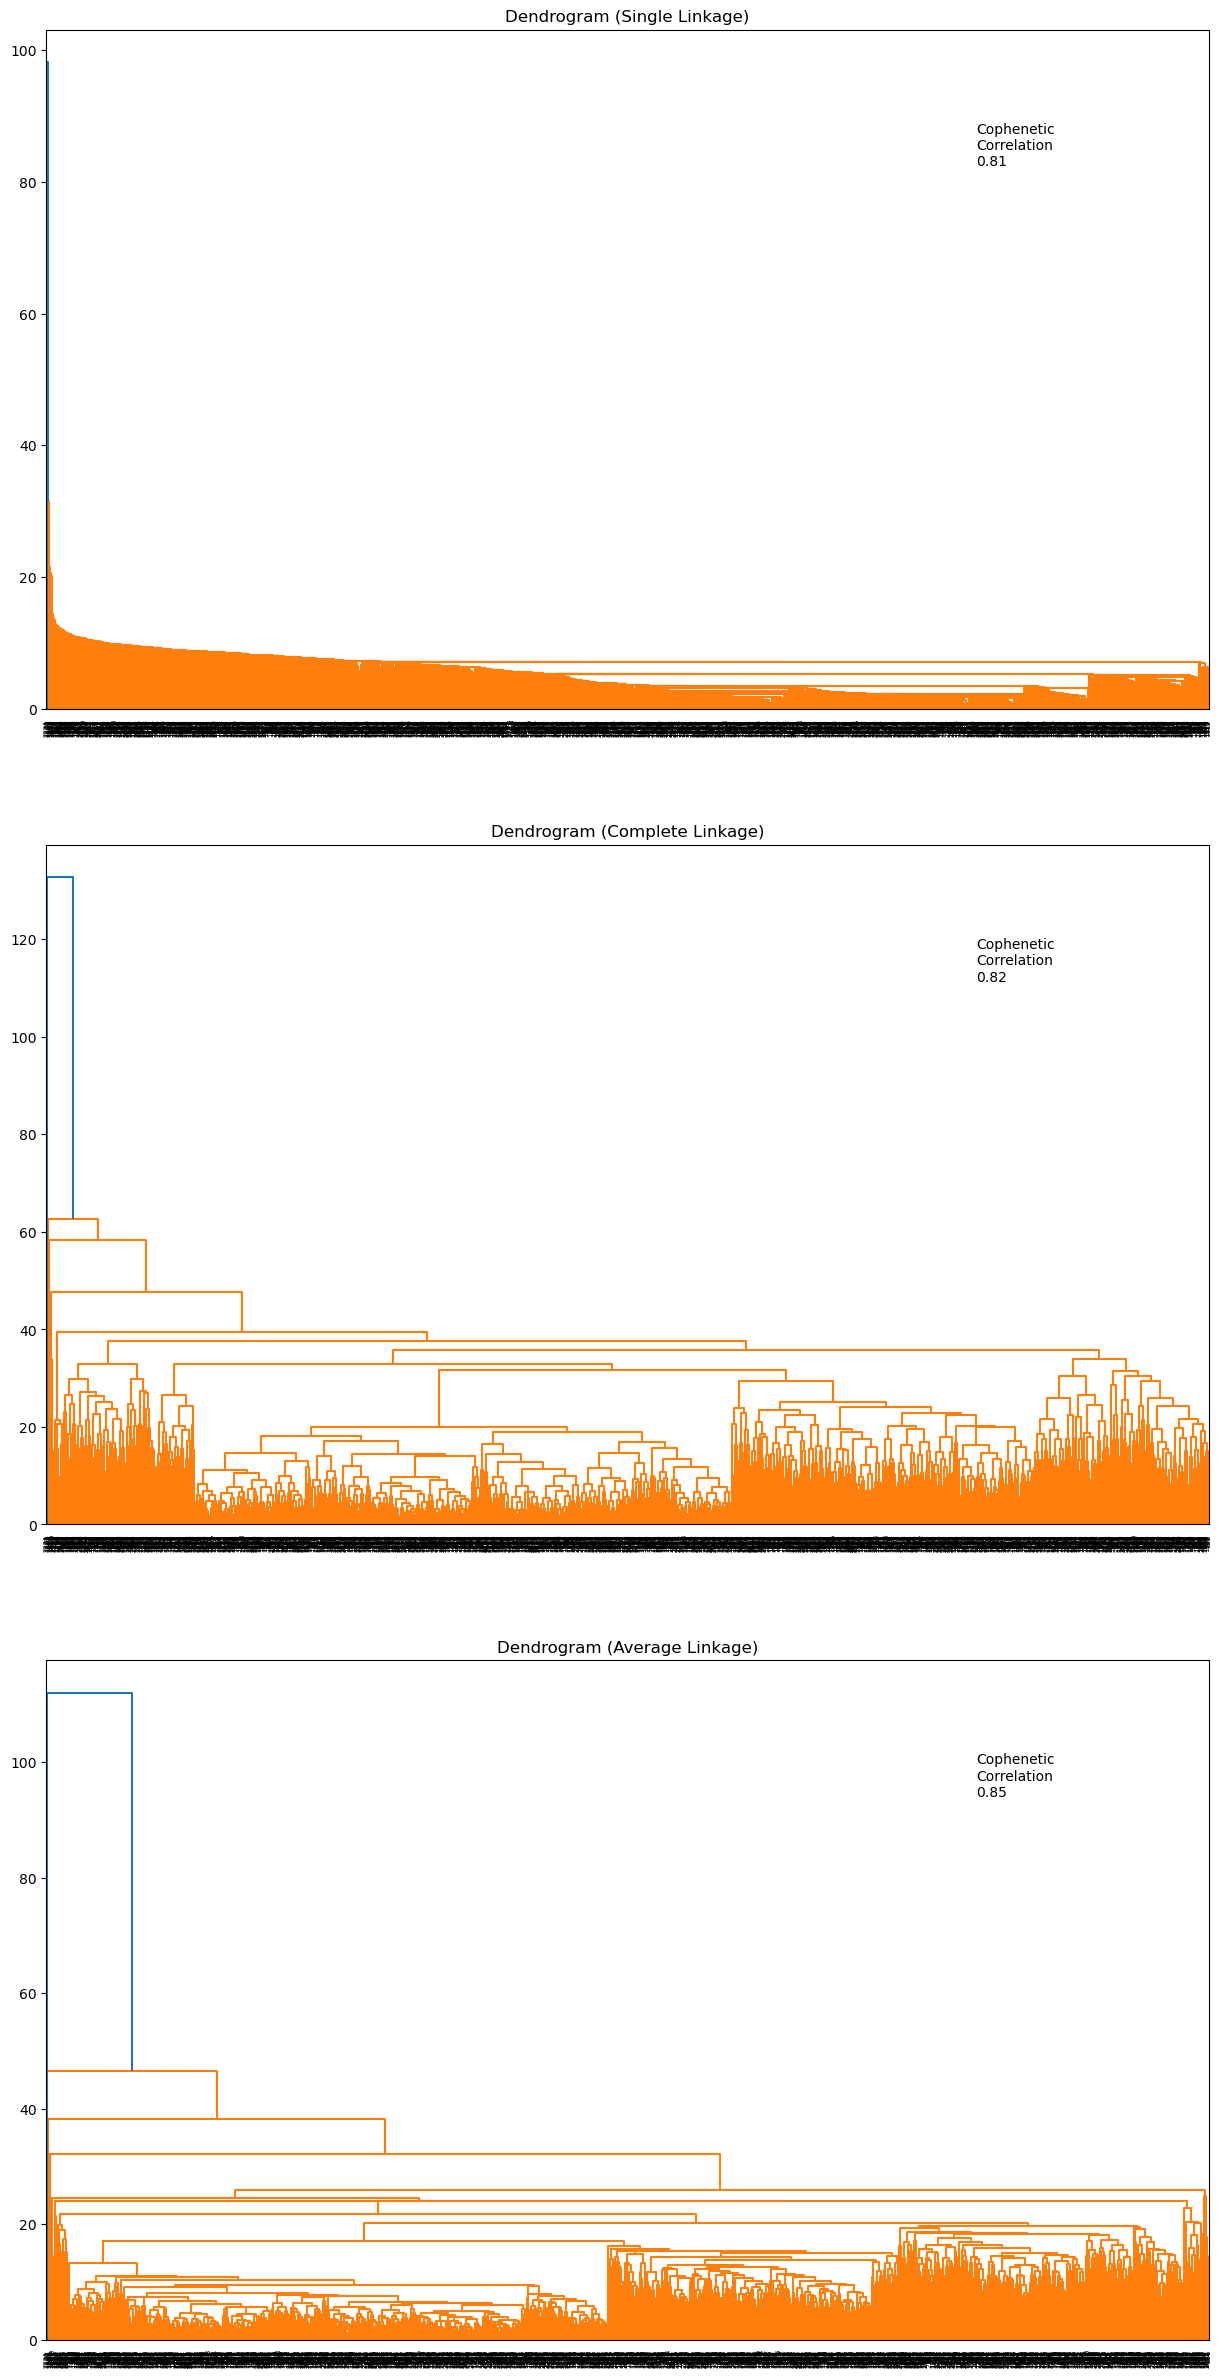

In [77]:
from scipy.cluster.hierarchy import dendrogram


# List of linkage methods
linkage_methods = ["single", "complete", "average"]

# Lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# Creating a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))            # Setting the plot size

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(data_pca, metric="Cityblock", method=method)                  # Measures the distances between two clusters

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")           # Title of dendrogram

    coph_corr, coph_dist = cophenet(Z, pdist(data_pca))                       # Finding cophenetic correlation for different linkages with city block distance
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Think about it:**

- Can we clearly decide the number of clusters based on where to cut the dendrogram horizontally?
- What is the next step in obtaining number of clusters based on the dendrogram?
- Are there any distinct clusters in any of the dendrograms?

### **Visualize the clusters using PCA**

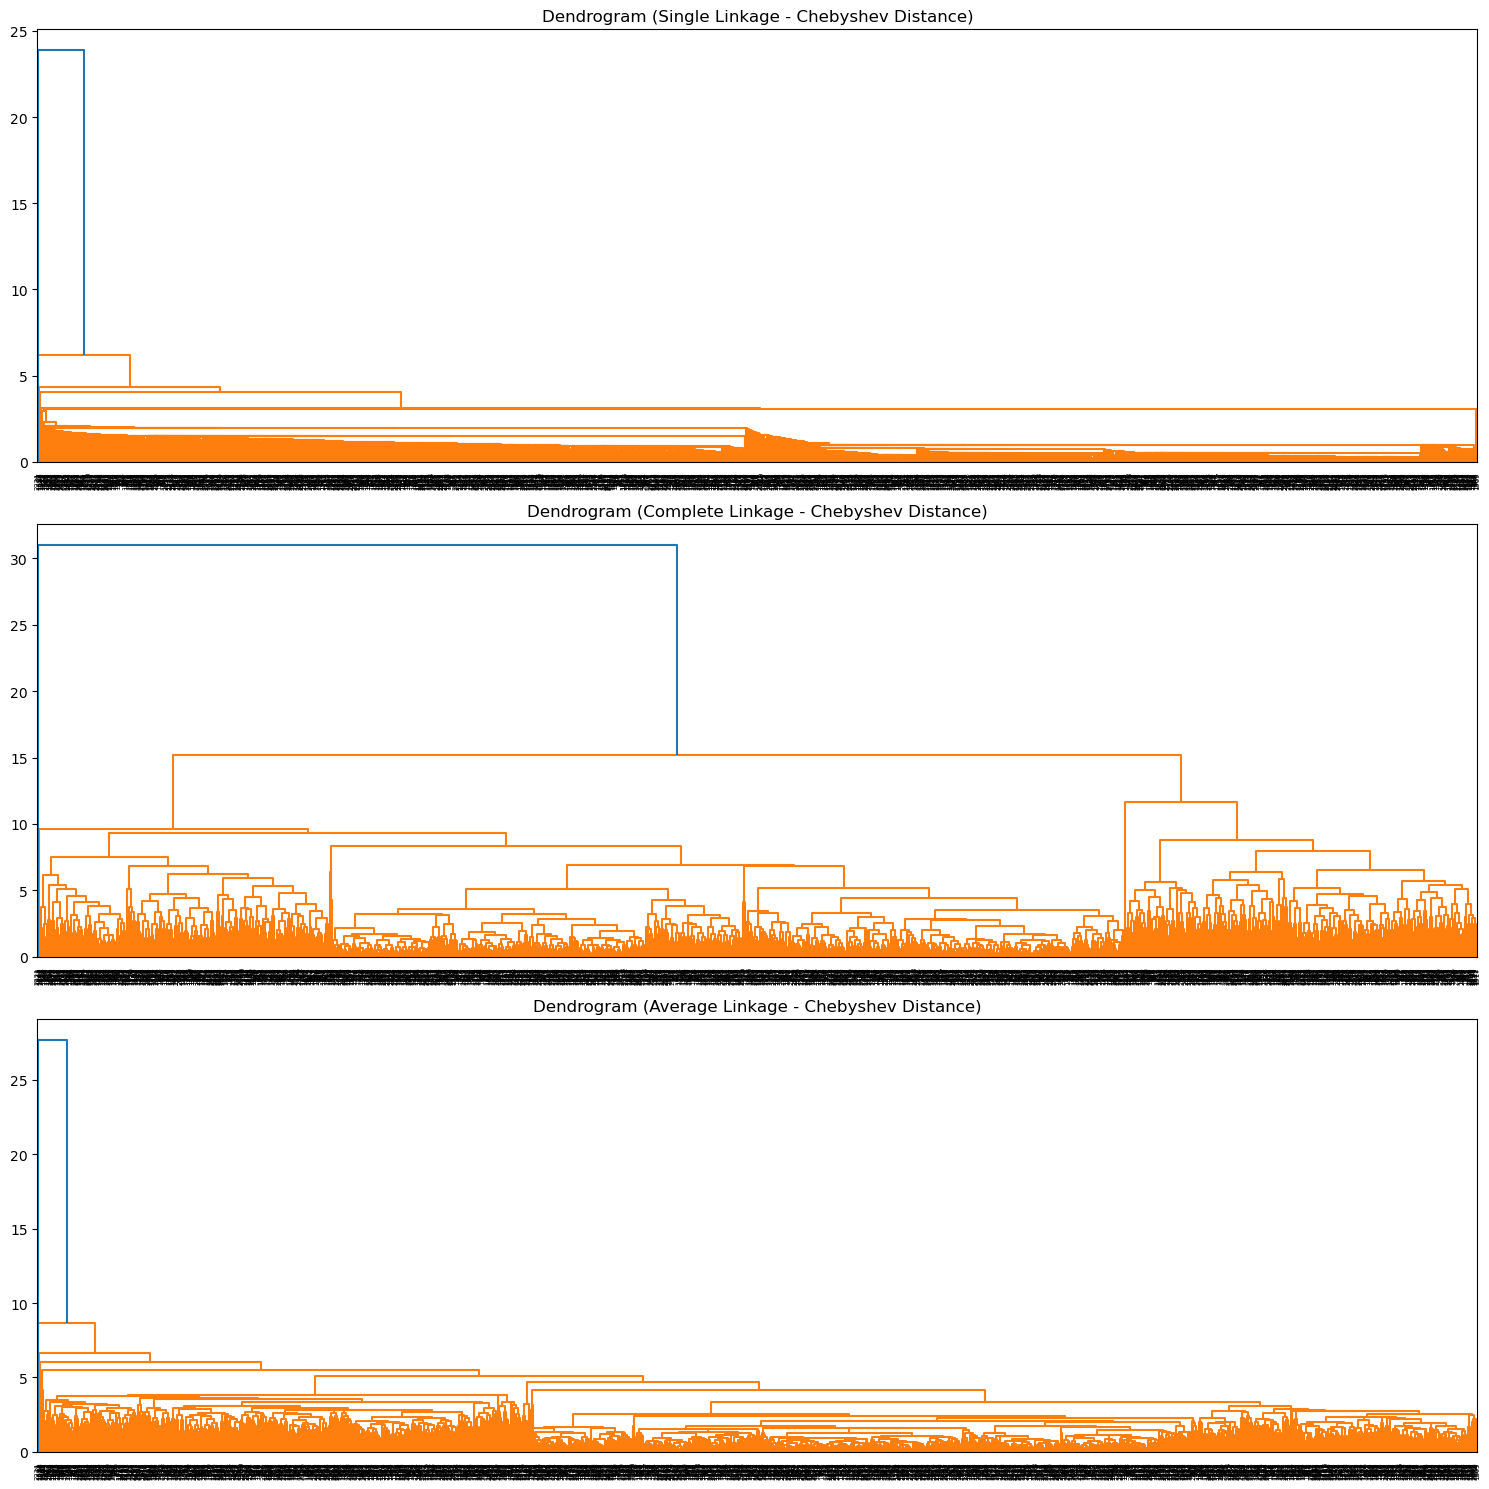

In [78]:
linkage_methods = ["single", "complete", "average"]

# Creating subplots for each linkage method
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 15))

# Generating and plot dendrogram for each linkage method
for i, method in enumerate(linkage_methods):
    # Generating the linkage matrix using Chebyshev distance
    Z = linkage(data_pca, metric="chebyshev", method=method)
    
    # Plotting dendrogram
    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage - Chebyshev Distance)')
    
plt.tight_layout()
plt.show()

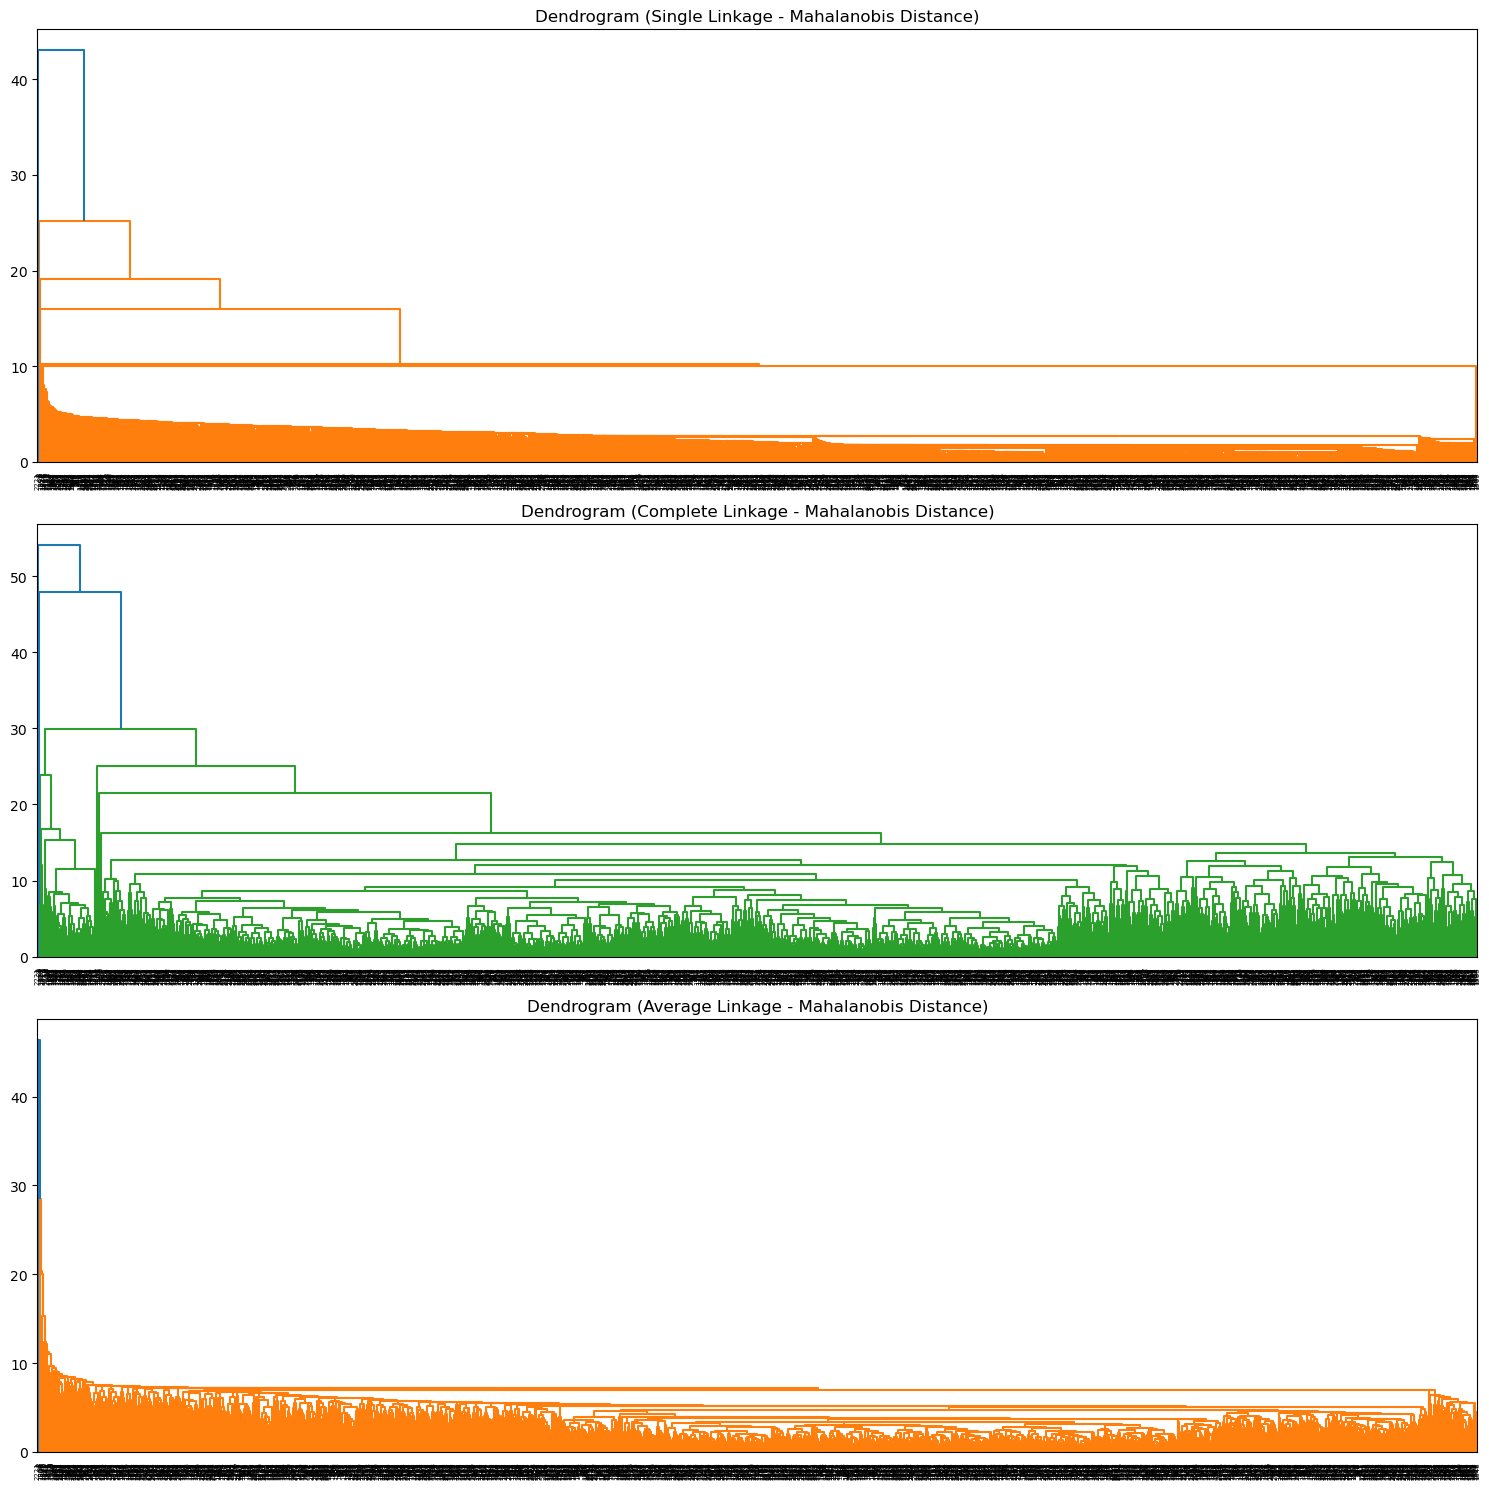

In [79]:

# Defining the linkage methods
linkage_methods = ["single", "complete", "average"]

# Creating subplots for each linkage method
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 15))

# Generating and plotting dendrogram for each linkage method
for i, method in enumerate(linkage_methods):
    # Generating the linkage matrix using Mahalanobis distance
    Z = linkage(data_pca, metric="mahalanobis", method=method)
    
    # Plotting dendrogram
    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage - Mahalanobis Distance)')
    
plt.tight_layout()
plt.show()


In [80]:
from sklearn.cluster import AgglomerativeClustering

# Initializing Agglomerative Clustering with 3 clusters, Euclidean affinity, and 'ward' linkage
HCmodel = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# Fitting the model on data_pca
HCmodel.fit(data_pca)


AgglomerativeClustering(affinity='euclidean', n_clusters=3)

### **Cluster Profiling**

In [81]:
# Adding Agglomerative Clustering cluster labels to data_pca
data_pca['Agg_Cluster_Labels'] = HCmodel.labels_

# Adding Agglomerative Clustering cluster labels to the whole data
df['Agg_Cluster_Labels'] = HCmodel.labels_

# Adding Agglomerative Clustering cluster labels to data_model
data_model['Agg_Cluster_Labels'] = HCmodel.labels_

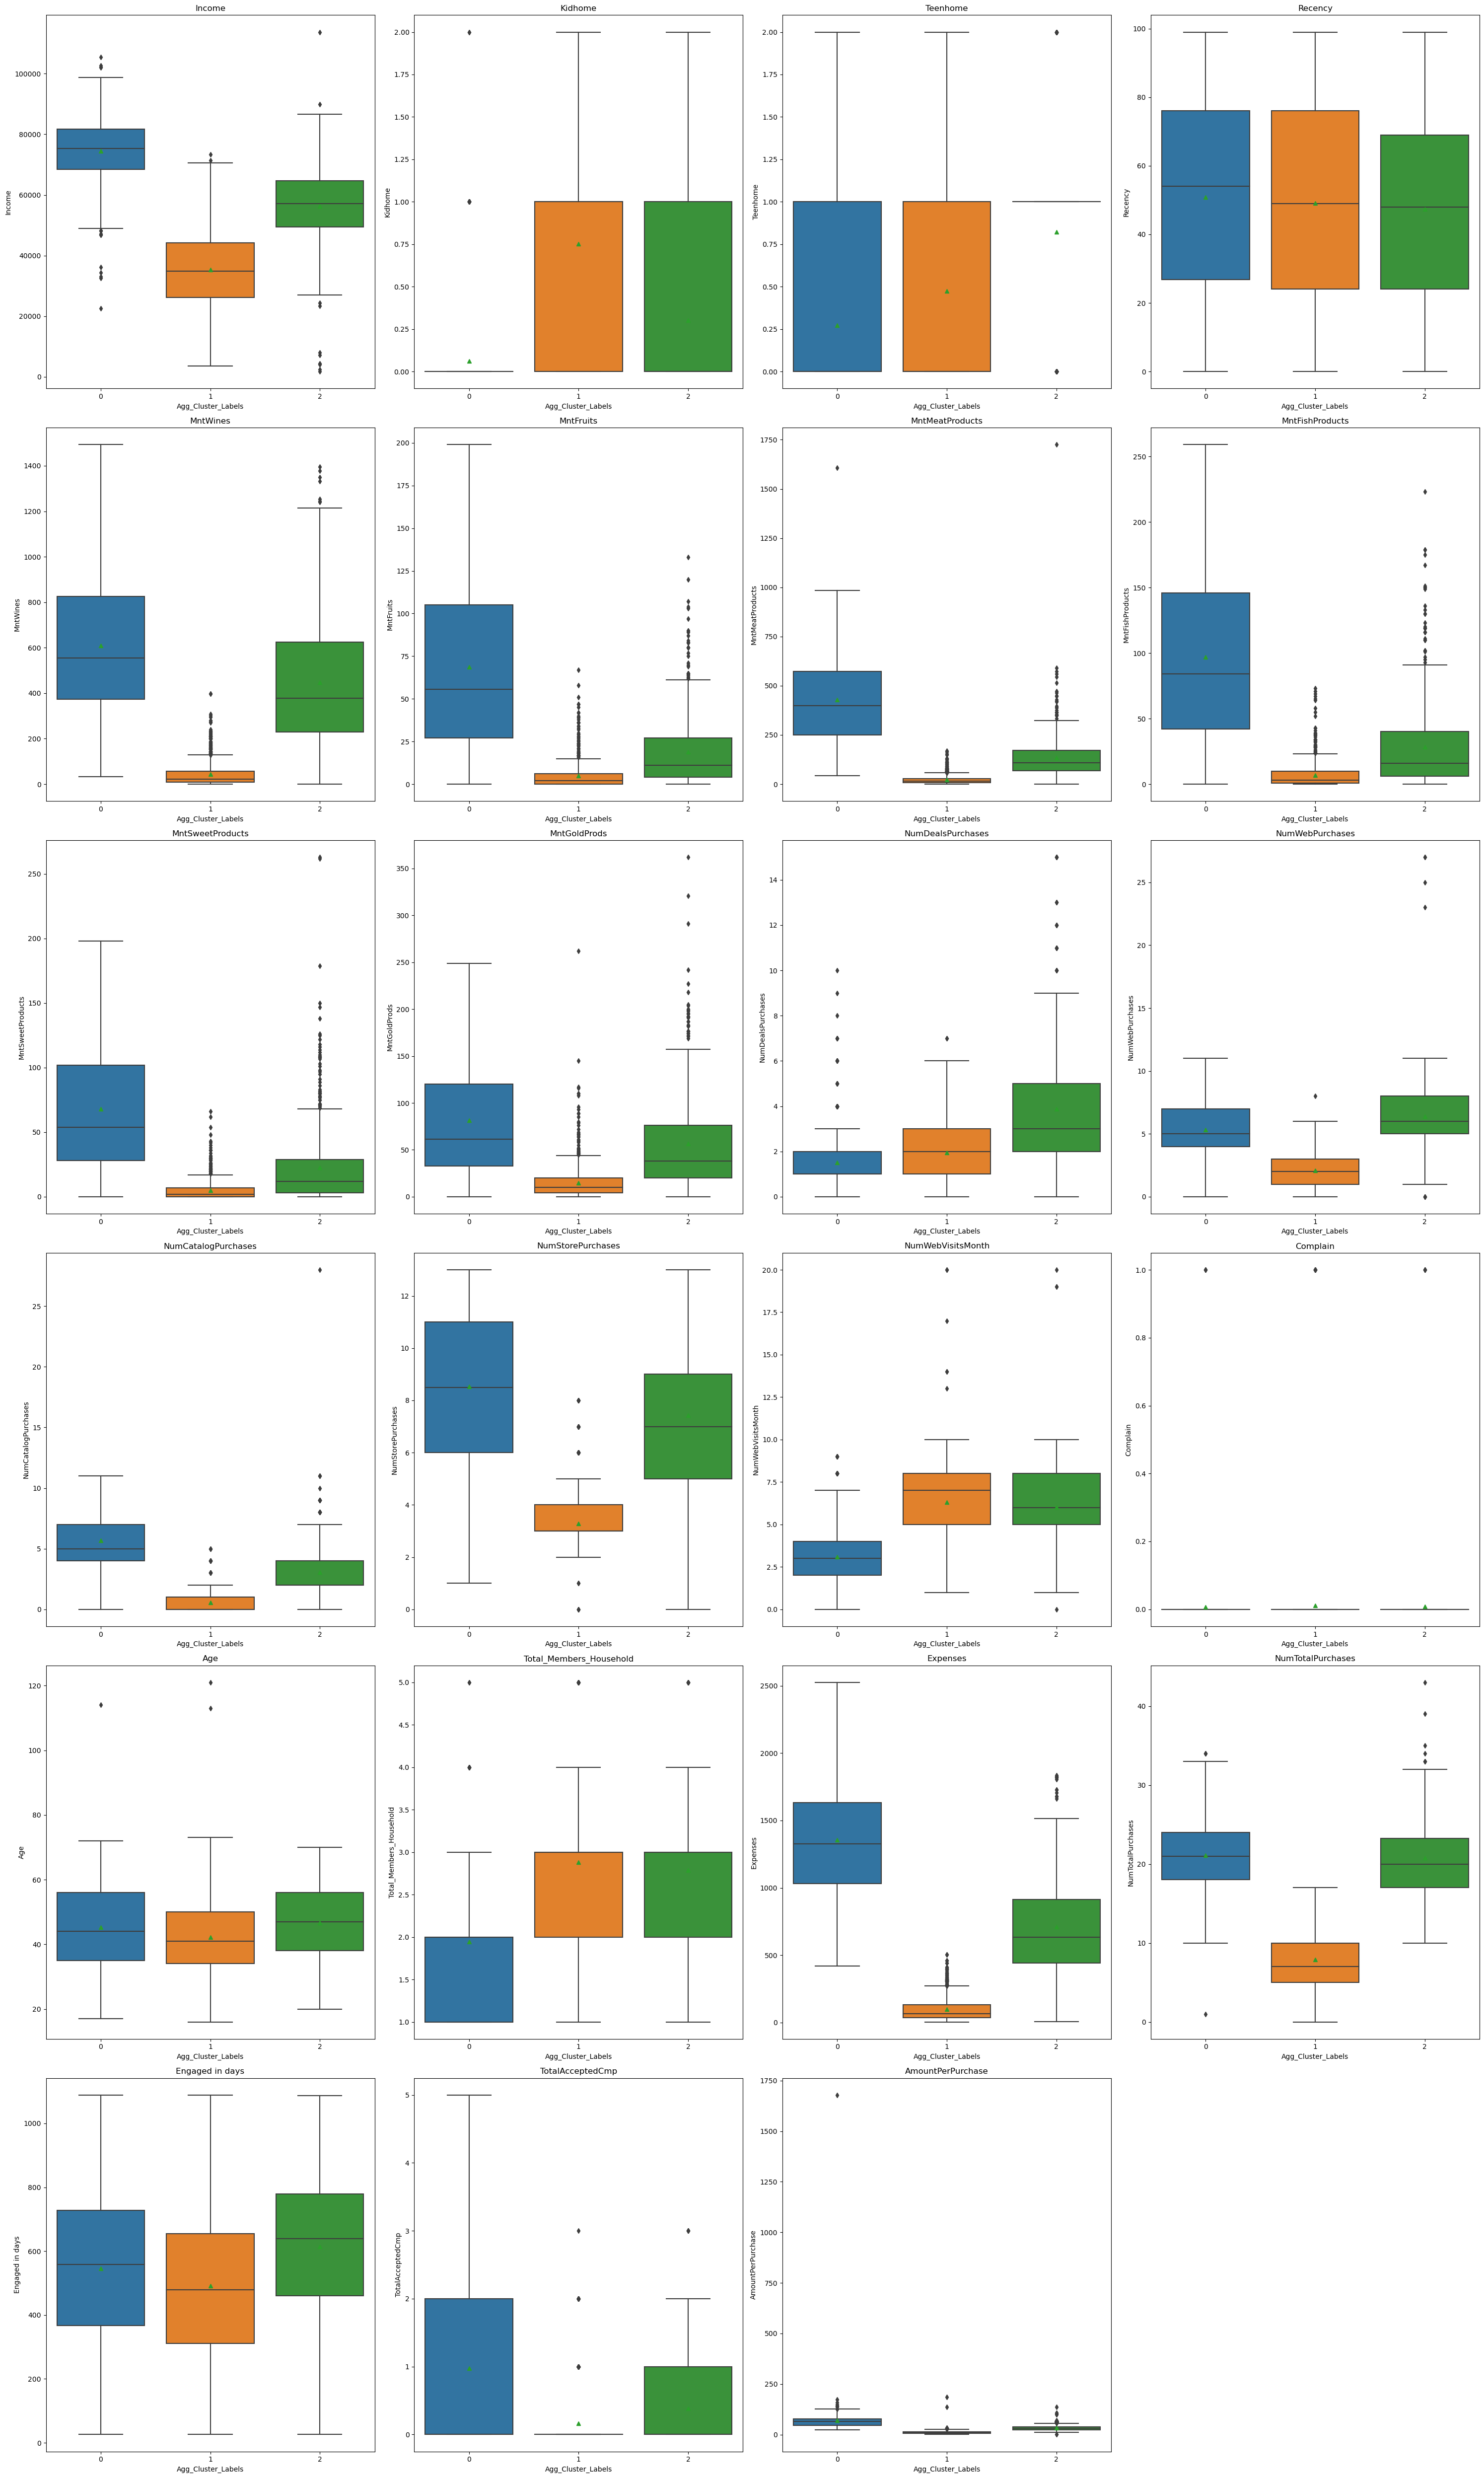

In [82]:
# Columns to use in boxplot
col_for_box = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Age', 'Total_Members_Household', 'Expenses', 'NumTotalPurchases', 'Engaged in days', 'TotalAcceptedCmp', 'AmountPerPurchase']

# Creating boxplot for each of the variables
plt.figure(figsize=(30, 50))

for i, variable in enumerate(col_for_box):
    plt.subplot(6, 4, i + 1)
    
    # Creating the boxplot
    sns.boxplot(y=df[variable], x=df['Agg_Cluster_Labels'], showmeans=True)
    
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [83]:
cluster_means2 = df.groupby('Agg_Cluster_Labels').mean()

print(cluster_means2)

                     Year_Birth        Income   Kidhome  Teenhome    Recency  \
Agg_Cluster_Labels                                                             
0                   1967.697115  74509.314514  0.060897  0.272436  50.788462   
1                   1970.910577  35334.633911  0.751923  0.475000  49.081731   
2                   1966.117958  56371.787866  0.302817  0.823944  47.322183   

                      MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Agg_Cluster_Labels                                                            
0                   609.570513  68.830128       430.201923        97.179487   
1                    43.978846   4.984615        22.941346         7.016346   
2                   448.052817  18.920775       135.014085        28.320423   

                    MntSweetProducts  ...        Age  Total_Kids_And_Teens  \
Agg_Cluster_Labels                    ...                                    
0                          67.998397  ...  45.3

In [84]:
highlighted = cluster_means2.style.highlight_max(color='lightgreen', axis=0)

highlighted

**Observations and Insights:** 

**1) Income:**

Cluster 1 has the highest median income, indicating it consists of higher-earning individuals.
Cluster 0 has the lowest median income, suggesting it includes lower-earning individuals.
Cluster 2 is in the middle in terms of income levels.

**2) Kidhome (Number of kids at home):**

Cluster 2 has the highest median value, suggesting that this cluster likely contains families with more children.
Clusters 0 and 1 have lower medians, with Cluster 0 slightly higher than Cluster 1, indicating fewer children at home on average.

**3) Teenhome (Number of teens at home):**

Cluster 2 again has the highest median value, suggesting that families in this cluster also have more teenagers.
Cluster 1 has fewer teenagers on average than Cluster 2 but more than Cluster 0.
Cluster 0 has the lowest median, suggesting fewer teenagers at home.

**4) Recency (Time since last purchase):**

All clusters have similar median recency values, although Cluster 2's median is slightly lower, indicating more recent interactions with the company's products or services.
The interquartile ranges are quite broad for all clusters, suggesting variability within each cluster regarding recent engagement with the company.

**5) MntWines (Amount spent on wines):**

Cluster 1 spends the most on wines, which aligns with the higher income levels observed.
Cluster 0 spends the least, consistent with their lower income.
Cluster 2 is in the middle but closer to Cluster 0.

**6) MntFruits (Amount spent on fruits):**

Cluster 1 also leads in fruit spending, potentially indicating a preference for or greater financial ability to purchase these items.
Cluster 0 is again on the lower end.
Cluster 2 spends more than Cluster 0 but less than Cluster 1.

**7) MntMeatProducts (Amount spent on meat products):**

Cluster 1 has the highest expenditures on meat products, while Cluster 0 has the lowest.
Cluster 2's spending is more moderate compared to the other two clusters.

**8) MntFishProducts (Amount spent on fish products):**

Cluster 1 again spends the most on fish products, while Cluster 0 spends the least.
Cluster 2's expenditure is higher than Cluster 0's but still significantly lower than Cluster 1's.


**9) MntSweetProducts (Amount spent on sweet products):**

Cluster 0 has the widest range and the highest median spending on sweet products, suggesting a strong preference for these items.
Clusters 1 and 2 have significantly lower median values, with Cluster 2 being the lowest.

**10) MntGoldProds (Amount spent on gold products):**

Cluster 0 again shows the highest median spending, indicating a preference or a higher budget for gold products.
Cluster 2 spends the least on gold products, with Cluster 1 in the middle.

**11) NumDealsPurchases (Number of purchases made with a deal):**

Cluster 2 has the highest median value, suggesting that customers in this cluster are more likely to be attracted to deals.
Clusters 0 and 1 show a lower propensity for deal purchases, with Cluster 1 slightly lower than Cluster 0.

**12) NumWebPurchases (Number of purchases made through the company’s website):**

Cluster 0 has the highest median number of web purchases, indicating they are the most active online shoppers.
Cluster 2 is again the lowest, suggesting less engagement with online shopping.

**13) NumCatalogPurchases (Number of purchases made using a catalog):**

Cluster 0 has the highest median number of catalog purchases, suggesting a preference for this shopping channel.
Clusters 1 and 2 have lower median values, with Cluster 2 once more being the lowest.

**14) NumStorePurchases (Number of purchases made directly in stores):**

Cluster 0 shows a high median number of store purchases, indicating they also frequently shop in physical stores.
Cluster 1 has the lowest median number of store purchases.

**15) NumWebVisitsMonth (Number of visits to company’s website in a month):**

Cluster 1 has the highest median number of website visits per month, suggesting they are the most active in visiting the company's website but not necessarily making purchases.
Cluster 2 has the lowest median, suggesting less frequent online engagement.

**16) Complain (Number of complaints made):**

All clusters have a low number of complaints, but Cluster 0 has a slightly higher median, indicating they may have more issues or higher expectations.

**17) Age:**

Cluster 1 has the highest median age, indicating it likely consists of older customers.
Cluster 0 has the lowest median age, suggesting it includes younger customers.
Cluster 2's age distribution is between Cluster 0 and Cluster 1.

**18) Total_Members_Household (Total number of household members):**

Cluster 1 has the highest median, indicating larger household sizes, possibly families.
Clusters 0 and 2 have smaller household sizes, with Cluster 0 being slightly larger than Cluster 2.

**19) Expenses:**

Cluster 2 has the highest median expenses, suggesting these customers spend more overall.
Cluster 0 has the lowest median expenses, possibly reflecting the younger demographic's spending power.
Cluster 1's expenses are moderate, falling between the other two clusters.

**20) NumTotalPurchases (Total number of purchases):**

Cluster 2 has the highest median number of purchases, indicating that these customers shop more frequently.
Cluster 0 has the least number of purchases.
Cluster 1 is again in the middle but closer to Cluster 0 in terms of the number of purchases.

**21) Engaged_in_days (Days since last engagement):**

Cluster 1 has the widest range and the highest median days since last engagement, which may suggest less frequent interactions with the company.
Cluster 0 has the lowest median engagement days, indicating more recent interactions.
Cluster 2 has a moderate level of recent engagement.

**22) TotalAcceptedCmp (Total number of accepted marketing campaigns):**

Cluster 2 shows the highest median acceptance of marketing campaigns, suggesting they are more responsive to marketing efforts.
Cluster 0 has the lowest median acceptance, which could correlate with the younger demographic being less responsive to marketing.
Cluster 1 has a moderate response rate, higher than Cluster 0 but lower than Cluster 2.

**23) AmountPerPurchase:**

Cluster 2 has the highest median amount per purchase, suggesting they spend more per transaction, possibly on higher-ticket items or bulk purchases.
Clusters 0 and 1 spend less per purchase, with Cluster 0 spending the least.

### **Characteristics of each cluster**

**Summary of each cluster:**

**Cluster 0: Young, Active Shoppers with Diverse Interests**

Youngest demographic with the lowest median age and lower income levels.
Despite lower incomes, they have the highest spending on non-essential items such as sweets and gold, suggesting a willingness to spend on luxury or indulgent products.
They are the most active in terms of online and catalog purchases, indicating a comfort with and preference for a variety of shopping channels, including digital.
Tend to visit physical stores frequently, reflecting a multi-channel shopping behavior.
Have a slightly higher tendency to lodge complaints, which might reflect higher service expectations or a greater willingness to provide feedback.
Engage with the company more recently compared to others, showing ongoing interactions.

**Cluster 1: Established, Possibly Older Customers with Larger Households**

Highest median age and largest household size, which may indicate more established life circumstances, possibly with families.
Highest income, yet with moderate overall expenses and a balanced spending pattern across categories, suggesting financial stability and careful spending.
Moderate engagement in both online and offline purchases, with a tendency to visit the company's website frequently, perhaps for research or price comparisons.
Shows some responsiveness to marketing campaigns and spends a reasonable amount per purchase, implying considered purchasing decisions.

**Cluster 2: Middle-Aged, Family-Centric Consumers with Frequent Engagement**

Median age group with mid-level incomes but the highest overall expenses, likely driven by the needs of larger households.
Most frequent acceptance of marketing campaigns, which suggests they are open to and influenced by marketing.
Highest number of total purchases, indicating frequent transactions, potentially for family or household needs.
Engage with the company more frequently and spend more per transaction, possibly on necessities or bulk buying.
Less likely to complain, which may suggest either satisfaction with the company's offerings or a less confrontational attitude.

## **DBSCAN**

DBSCAN is a very powerful algorithm for finding high-density clusters, but the problem is determining the best set of hyperparameters to use with it. It includes two hyperparameters, `eps`, and `min samples`.

Since it is an unsupervised algorithm, you have no control over it, unlike a supervised learning algorithm, which allows you to test your algorithm on a validation set. The approach we can follow is basically trying out a bunch of different combinations of values and finding the silhouette score for each of them.

In [85]:
# Initializing lists
eps_value = [2,3]                       # Taking random eps value
min_sample_values = [6,20]              # Taking random min_sample value

# Creating a dictionary for each of the values in eps_value with min_sample_values
res = {eps_value[i]: min_sample_values for i in range(len(eps_value))}  

In [86]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
# Finding the silhouette_score for each of the combinations
high_silhouette_avg = 0                                               # Assigning 0 to the high_silhouette_avg variable
high_i_j = [0, 0]                                                     # Assigning 0's to the high_i_j list
key = res.keys()                                                      # Assigning dictionary keys to a variable called key
for i in key:
    z = res[i]                                                        # Assigning dictionary values of each i to z
    for j in z:
        db = DBSCAN(eps=i, min_samples=j).fit(data_pca)               # Applying DBSCAN to each of the combination in dictionary
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        silhouette_avg = silhouette_score(data_pca, labels)           # Finding silhouette score 
        print( 
            "For eps value =" + str(i),
            "For min sample =" + str(j),
            "The average silhoutte_score is :",
            silhouette_avg,                                          # Printing the silhouette score for each of the combinations
        )
        if high_silhouette_avg < silhouette_avg:                     # If the silhouette score is greater than 0 or the previous score, it will get appended to the high_silhouette_avg list with its combination of i and j              
            high_i_j[0] = i
            high_i_j[1] = j

For eps value =2 For min sample =6 The average silhoutte_score is : 0.12683520538668996
For eps value =2 For min sample =20 The average silhoutte_score is : 0.16742001157081135
For eps value =3 For min sample =6 The average silhoutte_score is : 0.2951671466945085
For eps value =3 For min sample =20 The average silhoutte_score is : 0.3090945844460358


In [87]:
# Printing the highest silhouette score
print("Highest_silhoutte_avg is {} for eps = {} and min sample = {}".format(high_silhouette_avg, high_i_j[0], high_i_j[1]))

Highest_silhoutte_avg is 0 for eps = 3 and min sample = 20


### **Apply DBSCAN for the best hyperparameter and visualize the clusters from PCA**

In [97]:
optimal_eps = 3  # The value of eps that resulted in the highest silhouette score
optimal_min_samples = 20  # The value of min_samples that resulted in the highest silhouette score

# Initializing DBSCAN with these hyperparameters
dbs = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)

# Assuming data_pca is your dataset to cluster
# Fitting the model
dbs.fit(data_pca)

DBSCAN(eps=3, min_samples=20)

In [98]:
# Fitting and predicting on data_pca
dbscan_labels = dbs.fit_predict(data_pca)

# Adding DBSCAN cluster labels to the whole data
df['DBSCAN_Clusters'] = dbscan_labels

# Adding DBSCAN cluster labels to data_model
data_model['DBSCAN_Clusters'] = dbscan_labels

# Adding DBSCAN cluster labels to data_pca
data_pca['DBSCAN_Clusters'] = dbscan_labels

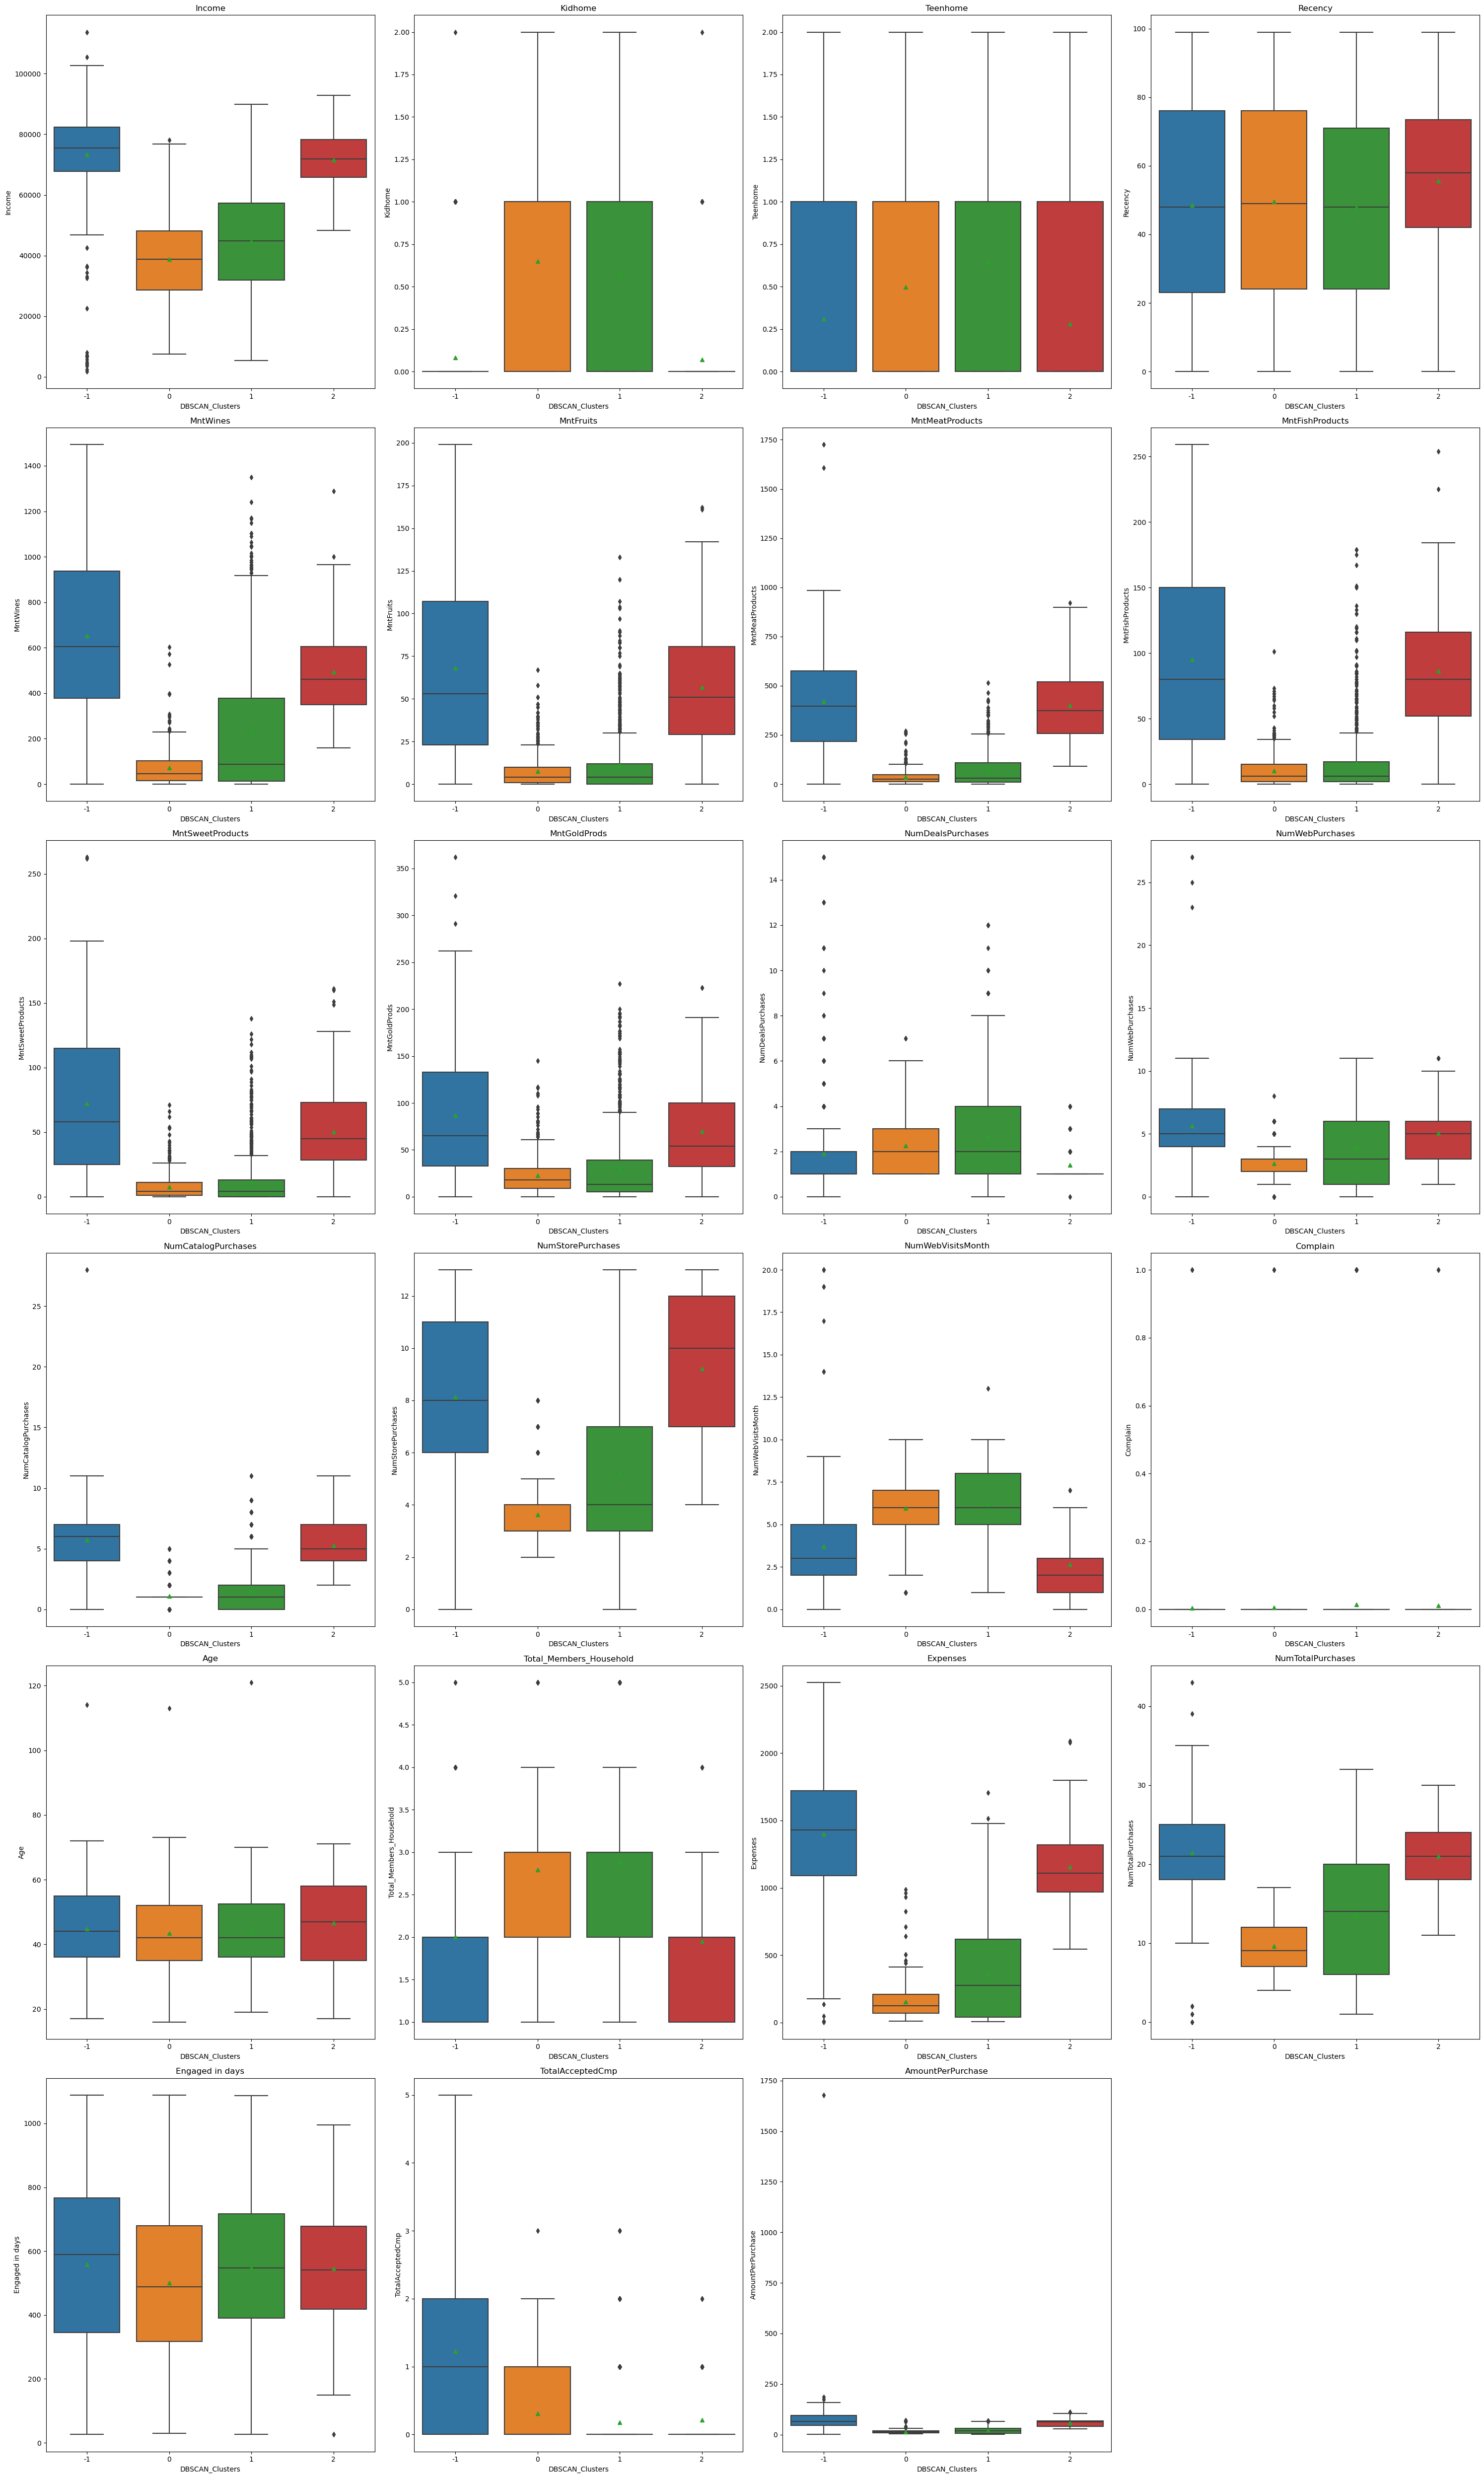

In [130]:
# Columns to use in boxplot
col_for_box = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Age', 'Total_Members_Household', 'Expenses', 'NumTotalPurchases', 'Engaged in days', 'TotalAcceptedCmp', 'AmountPerPurchase']

# Creating boxplot for each of the variables
plt.figure(figsize=(30, 50))

for i, variable in enumerate(col_for_box):
    plt.subplot(6, 4, i + 1)
    
    # Creating the boxplot
    sns.boxplot(y=df[variable], x=df['DBSCAN_Clusters'], showmeans=True)
    
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations and Insights:**

The cluster labeled "-1" typically represents noise or anomalies detected by DBSCAN, which may not fit well into the other more homogenous clusters. The data points in Cluster -1 are considered outliers and do not belong to any well-defined cluster according to the DBSCAN's parameters and the dataset's structure.

eps=3: Two points need to be within a distance of 3 units to be considered neighbors. This sets the local neighborhood radius for cluster formation.

min_samples=20: A minimum of 20 points must be within the eps radius of a point for it to be considered a core point and for a cluster to be formed around it.

**1) Income:**

This boxplot suggests that Cluster 2  has the highest median income, Cluster 2 is in the middle, and Cluster 0 has the lowest median income.

**2) Kidhome:** 

All clusters have a similar median of kids at home, but Cluster 2 has a larger range, indicating more variation in the number of kids at home.

**3) Teenhome:**

Similar to Kidhome, all clusters have a similar median for teens at home.

**4) Recency:**

The median recency is quite similar across all clusters, indicating that the time since the last purchase is relatively consistent across the groups. 

**5) MntWines:**

The amount spent on wines varies significantly across clusters. Cluster 2 spends the most, Cluster 1 is in the middle, and Cluster 0 spends the least. The wide range in Clusters 0 and 2, along with outliers, suggests varied spending within those clusters.

**6) MntFruits:**

Spending on fruits is highest in Cluster 1, lower in Cluster 2, and lowest in Cluster 0. There is considerable variation within each cluster, as seen by the range and outliers.The spread and outliers suggest diverse spending behaviors within the Clusters 0 and 1.

**7) MntMeatProducts:**

Cluster 2 also leads in spending on meat products, followed by Cluster 1. Cluster 0 spends the least. The spread and outliers suggest diverse spending behaviors within the Clusters 0 and 1.

**8) MntFishProducts:** 

Cluster 2 spends the most on fish products than the other clusters, with Cluster 0 spending the least. The variation within clusters is indicated by the range and outliers. Cluster 1 has a lot of outliers.

**9) MntSweetProducts:** 

Cluster 2 has a much higher median spend, indicating that customers in this cluster tend to spend more on sweet products. Clusters 0 and 1 have lower medians and tighter interquartile ranges.

**10) MntGoldProds:** 

Cluster 2 exhibits a wide range and a low median spend on gold products, similar to sweet products. Cluster 2 again has a high median spend, but with fewer extreme values than Cluster 1. Clusters 0 and 1 are consistent with the pattern seen in MntSweetProducts, with Cluster 2 spending slightly more than Cluster 1.

**11) NumDealsPurchases**

Cluster 1 has the highest median and more outliers than Clusters 0 and 2. Cluster 2 has the lowest median. 

**12) NumWebPurchases**

Cluster 2 has higher median than Clusters 0 and 1. While Cluster 0 has the lowest median it has more outliers than other Clusters.

**13) NumCatalogPurchases:** 

Cluster 0 members make very few catalog purchases, Cluster 2 significantly more. 

**14) NumStorePurchases:** 

Cluster 0 shows minimal store purchases. Cluster2 stands out with a much higher median, suggesting these customers prefer shopping in stores. Clusters 0 and 1 have moderate medians, with Cluster 1 having a slightly higher median indicating more in-store purchases than Cluster 0.

**15) NumWebVisitsMonth:** 

Here, Cluster 2 has the lowest median of website visits, whereas Cluster 1 has the highest, indicating they are most engaged online. Clusters 0 and 1 have similar medians, suggesting moderate online engagement.

**16) Complain:** 

All clusters show low numbers of complaints.

**17) Age:** 

Cluster 0 has a median age that suggests a middle-aged demographic, while Cluster 1 is similar but slightly older on average. Cluster 2 has the highest median age, indicating it predominantly consists of older individuals.

**18) Total_Members_Household:** 

Cluster 2 has a lowest median, suggesting smaller household sizes. While Clusters 0 and 1 are in the same category. 

**19) Engaged in days:** 

Cluster 1 has a median indicating recent engagement, while Cluster 0 has the least recent engagement on average. Cluster 2 has a highest median compared to the others.

**20) TotalAcceptedCmp:** 

Cluster 0 has the highest median, indicating more responsiveness to marketing. While Clusters 1 and 2 are about the same. 

**21) Expenses:** 

Cluster 2 has the highest median, indicating the highest spenders are in this cluster. Cluster 1 has a lower median than Cluster 2 but higher than Cluster 0, indicating moderate spending.

**22) NumTotalPurchases:**

Cluster 1 has a higher median number of purchases, Cluster 2 even more so, and Cluster 2 has the highest median, suggesting they make the most purchases.

**23) AmountPerPurchase:** 

Cluster 2 has the highest median spend per purchase, suggesting they buy more expensive items or larger quantities per transaction than other Clusters.

**Think about it:**

**- Changing the eps and min sample values will result in different DBSCAN results? Can we try more value for eps and min_sample?** if we try more eps we will have more noise and less clusters. 

### **Characteristics of each cluster**

**Summary of each cluster:**

**Cluster 0 (budget-conscious, deal-seeking, younger consumers with less disposable income):**

Constitutes the lower-income group with minimal spending on luxury products such as wine, meat, and gold.
They have a lower median age, indicating a younger demographic, potentially with a smaller household size.
This cluster has a higher frequency of deal purchases, suggesting a preference for discounts and deals, possibly due to lower income levels.
Engagement with the company, both in terms of recency and responsiveness to marketing campaigns, is moderate.
Total expenses are the lowest, which corresponds with the lowest income and conservative spending per purchase.

**Cluster 1 (consists of affluent, brand-engaged, mature consumers who are responsive to marketing and prefer quality or luxury spending):**

This cluster represents a higher income group with significant spending on luxury items, indicating more disposable income.
Members of this cluster have a higher median age, suggesting a more mature customer base.
They have moderate household sizes but show the highest responsiveness to marketing campaigns, indicating a potential interest in new products and willingness to engage with the brand.
Their engagement with the company is recent and frequent, with higher total expenses and the second-highest amount spent per purchase.
They make a significant number of total purchases but are not as inclined to purchase through deals, which could imply a lesser sensitivity to price.

**Cluster 2 (represent well-off, older consumers who make significant purchases in terms of value but may prefer traditional shopping channels over digital ones and are not driven by deals):**

This cluster falls in the middle income range but demonstrates the highest median spend on products across various categories.
They have the largest median household size, which might explain the higher expenditures on groceries and essentials.
Despite a high median age, they engage less with the company’s website and have the lowest number of web purchases, which could suggest a preference for traditional shopping methods or less tech-savviness.
They show moderate engagement in days and responsiveness to marketing campaigns, with substantial expenses and the highest spend per purchase, indicating a tendency to buy premium products or in bulk.

## **Gaussian Mixture Model**

In [119]:

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

gmm = GaussianMixture(n_components=3, random_state=1)

# Fitting the Gaussian Mixture Model and predict cluster labels using data_pca
preds = gmm.fit_predict(data_pca)

# Calculating the silhouette score
score = silhouette_score(data_pca, preds)


print(score)

0.30656169656891247


In [120]:
# Adding Gaussian Mixture Model cluster labels to the whole data
df['GMM_Clusters'] = preds

# Adding Gaussian Mixture Model cluster labels to data_model
data_model['GMM_Clusters'] = preds

# Adding Gaussian Mixture Model cluster labels to data_pca
data_pca['GMM_Clusters'] = preds

In [121]:
# Checking distribution in 'data'
print("Distribution in 'data':")
print(df['GMM_Clusters'].value_counts())

# Checking distribution in 'data_model'
print("\nDistribution in 'data_model':")
print(data_model['GMM_Clusters'].value_counts())

# Checking distribution in 'data_pca'
print("\nDistribution in 'data_pca':")
print(data_pca['GMM_Clusters'].value_counts())

Distribution in 'data':
0    1034
2     613
1     585
Name: GMM_Clusters, dtype: int64

Distribution in 'data_model':
0    1034
2     613
1     585
Name: GMM_Clusters, dtype: int64

Distribution in 'data_pca':
0    1034
2     613
1     585
Name: GMM_Clusters, dtype: int64


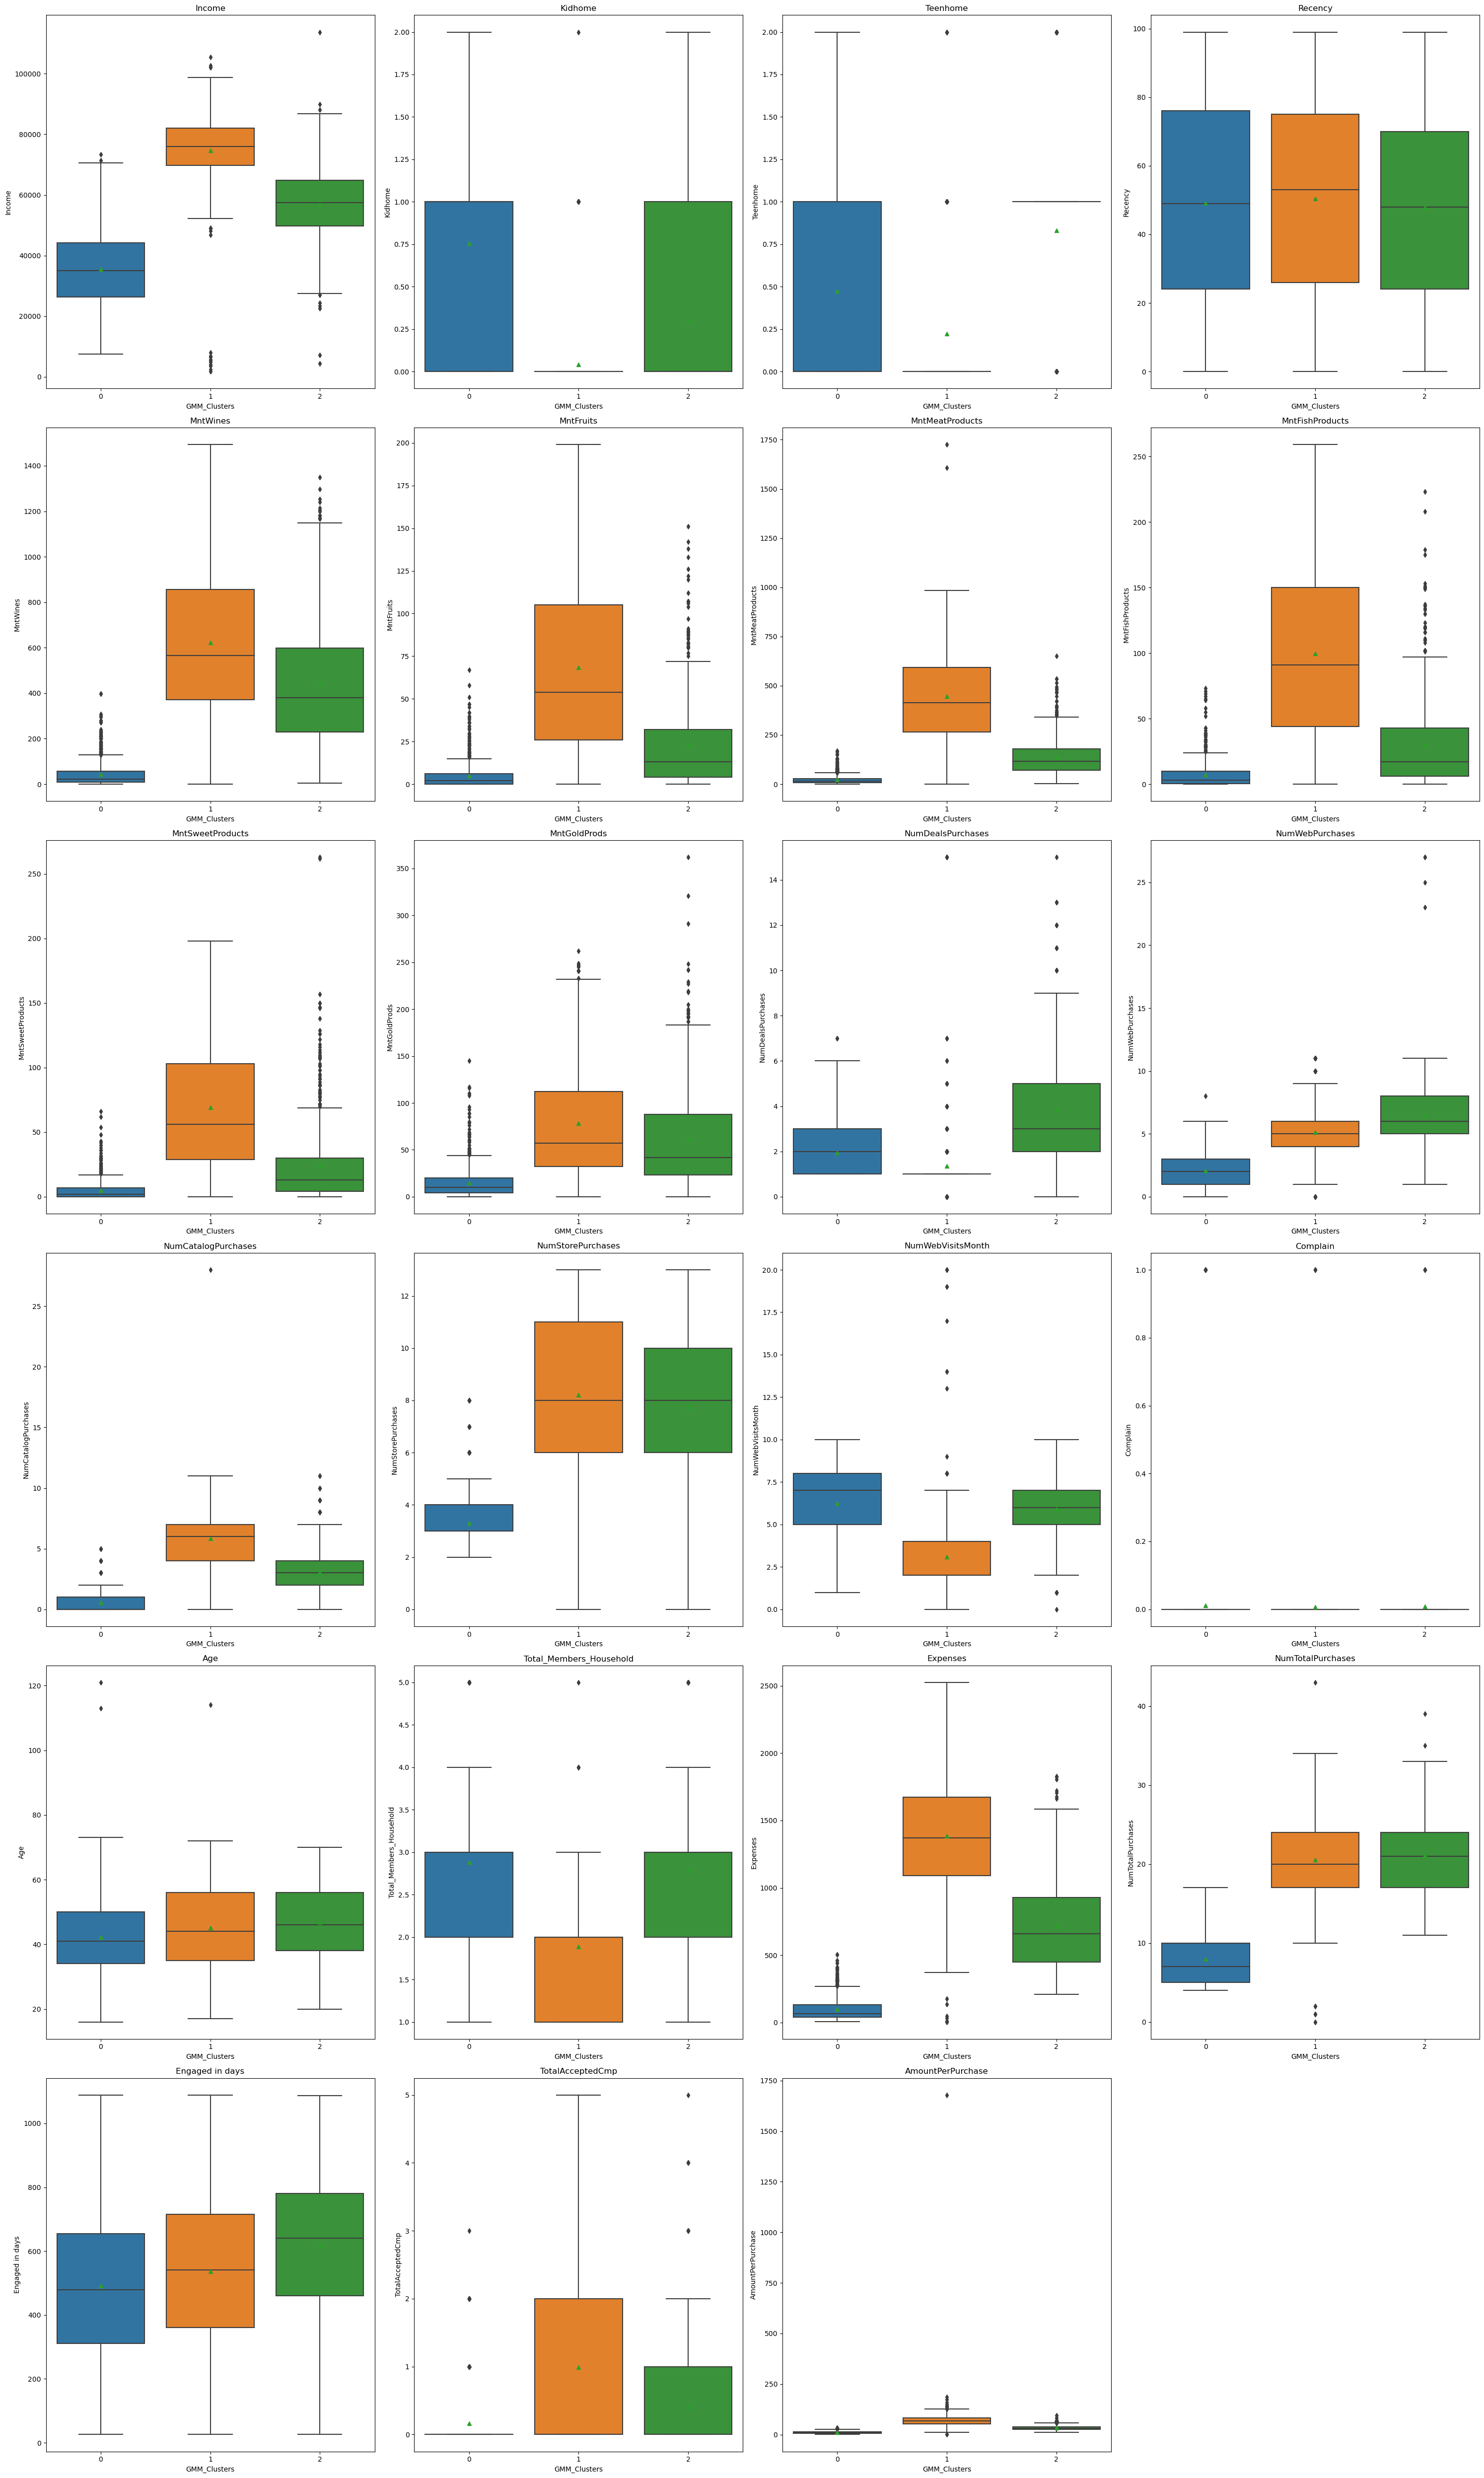

In [122]:
# Columns to use in boxplot
col_for_box = ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain', 'Age', 'Total_Members_Household', 'Expenses', 'NumTotalPurchases', 'Engaged in days', 'TotalAcceptedCmp', 'AmountPerPurchase']

# Creating boxplot for each of the variables
plt.figure(figsize=(30, 50))

for i, variable in enumerate(col_for_box):
    plt.subplot(6, 4, i + 1)
    
    # Creating the boxplot
    sns.boxplot(y=df[variable], x=df['GMM_Clusters'], showmeans=True)
    
    plt.tight_layout()
    plt.title(variable)

plt.show()

# **Observations and Insights:**

**1) Income:**

Cluster 0 has a wide range of incomes, but the median income is the lowest among the clusters.
Cluster 1 shows a higher median income with a narrower range than Cluster 0, suggesting more consistency in income levels.
Cluster 2 has the second highest median income after Cluster 1, with a few outliers indicating some individuals with very high incomes.

**2) Kidhome (Number of kids at home):**

All clusters have a similar median of kids at home, but Cluster 1 shows the largest variability.

**3) Teenhome (Number of teens at home):**

Similar to "Kidhome," there is not much difference in the medians across clusters, but Cluster 0 has a wider range.

**4) Recency (Recency of last purchase):**

Clusters have similar medians, suggesting that the last purchase was made around the same time ago across clusters.

**5) MntWines (Amount spent on wines):**

Cluster 0 spends the least on wines, with a lower median and fewer high spenders.
Cluster 1 has a higher median spending on wines, indicating a preference or greater financial ability to spend on wines.
Cluster 2 has the second median spending on wines, with significant outliers indicating some very high spenders.

**6) MntFruits (Amount spent on fruits):**

Cluster 0 has the lowest median spending on fruits, suggesting less preference or ability to spend on these products.
Clusters 1 and 2 have higher median spending, with Cluster 1 being slightly higher, but Cluster 2 having much more outliers. 

**7) MntMeatProducts (Amount spent on meat products):**

Cluster 0 again has the lowest median spending.
Cluster 2 has a moderate spending amount, but with a lot of high outliers.
Cluster 1 spends the most on meat, with a high median.


**8) MntFishProducts (Amount spent on fish products):**

Clusters 0 and 2 have lower median spending on fish products.
Cluster 1's spending is significantly higher, suggesting a preference for a higher budget for fish products.

**9) MntSweetProducts:**

Cluster 0 has the lowest median spending on sweet products, while Cluster 1 has the highest, suggesting different spending habits or preferences. Cluster 2 has moderate spending but with a wide interquartile range, indicating a diverse group.

**10) MntGoldProds:** 
Cluster 0 also has the lowest median spending on gold products, while Cluster 1 shows significantly higher spending, potentially reflecting a higher income or preference for luxury items. Cluster 2 is moderate.

**11) NumDealsPurchases:** 

Cluster 2 has higher medium of NumDealsPurchases, while Cluster 1 has the lowest, which suggests that people in are less intrested in purchases with deals in this cluster. 

**12) NumWebPurchases:** 

This measures the number of purchases made through the company's website. A higher median for Cluster 2 would suggest that these customers are more comfortable or inclined to shop online. If Cluster 0 has a lower median, it might indicate a preference for in-store or catalog shopping, potentially due to older demographics or shopping habits. Cluster 1 with a median value between the other clusters would suggest a balanced approach to online shopping, not as frequent as Cluster 2 but more so than Cluster 0.

**13) NumCatalogPurchases:**  

Cluster 0 makes the fewest purchases through catalogs, while Cluster 1 makes the most, which may indicate different shopping preferences or accessibility to catalog shopping. Cluster 2 has a lower median than Cluster 1 but higher than Cluster 0.

**14) NumStorePurchases:**  

The median number of store purchases is highest for Cluster 1, suggesting that these customers may prefer in-store shopping. Cluster 0 has the lowest median, indicating less frequent in-store purchases. Cluster 2 falls in between.

**15) NumWebVisitsMonth:**  

Cluster 1 has the highest median web visits per month, which could suggest a higher level of digital engagement. Cluster 0 has the lowest median, indicating less frequent online interactions, but more outliers than other clusters. Cluster 2 is similar to Cluster 0.

**16) Complain:**  

The number of complaints is relatively low across all clusters.

**17) Age:** 

This boxplot shows the distribution of ages across the clusters. Cluster 0 may contain younger individuals, indicated by a lower median age, whereas Cluster 2 may consist of older individuals, given the higher median age. The spread (interquartile range) can indicate the diversity of ages within the cluster.

**18) Total_Members_Household:** 

This metric likely represents the number of individuals in a household. If Cluster 1 has a lower median, it might suggest smaller household sizes, such as singles or couples without children, whereas Cluster 2, with a higher median, might suggest larger families or multi-generational households.

**19) Engaged_in_days:** 

Cluster 0 has the lowest median and lowest value. Cluster 2 has the highest median and highest value. 

**20) TotalAcceptedCmp:** 

This might denote the total number of accepted marketing campaigns. A higher median for Cluster 1 could imply that individuals in this cluster are more responsive to marketing, while a lower median for Cluster 0 suggests they are less influenced by such campaigns.

**21) Expenses:** 

If this boxplot displays the total expenditures for a given period, Cluster 1 having a higher median might suggest that this group has higher spending habits, which could correlate with higher income or larger household sizes. Cluster 0, with a lower median, might be more budget-conscious or have less disposable income.

**22) NumTotalPurchases:** 

This reflects the total number of purchases made by customers in each cluster. Cluster 1 with a higher median would suggest that they make more purchases overall, possibly due to larger household needs or higher consumerism. Cluster 0 making fewer purchases could be due to lower spending power or different shopping habits.

**23) AmountPerPurchase:** 

This boxplot may indicate the average spending amount per purchase. Cluster 1 having a higher median suggests they spend more money per transaction, which could be due to purchasing more expensive items or buying in bulk. Cluster 0 spending less per purchase might indicate a focus on lower-cost items or more conservative spending.

### **Cluster Profiling**

In [123]:
cluster_means = df.groupby('GMM_Clusters').mean()

print(cluster_means)

               Year_Birth        Income   Kidhome  Teenhome    Recency  \
GMM_Clusters                                                             
0             1970.932302  35508.035075  0.754352  0.474855  49.140232   
1             1967.929915  74699.868815  0.042735  0.223932  50.418803   
2             1966.006525  56845.473912  0.305057  0.831974  47.814029   

                MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
GMM_Clusters                                                            
0              44.023211   4.995164        23.023211         7.048356   
1             622.179487  68.464957       446.752137        99.726496   
2             442.265905  22.290375       136.765090        30.008157   

              MntSweetProducts  ...  Total_Members_Household     Expenses  \
GMM_Clusters                    ...                                         
0                     5.042553  ...                 2.882979    98.937137   
1                    69.365812  

In [124]:
highlighted = cluster_means.style.highlight_max(color='lightgreen', axis=0)

highlighted

### **Characteristics of each cluster**

**Summary of each cluster:**  

**Cluster 0 (Younger, price-sensitive, and selective shoppers):**   

This cluster might represent younger, price-sensitive consumers. They have the lowest median income, which correlates with lower spending on most product categories. This group tends to spend less on luxury items like wines, meats, and sweet products, and they make fewer purchases through catalogs and in stores. They are less responsive to marketing campaigns and have the least number of total purchases, suggesting a more selective and potentially budget-conscious shopping behavior. They may also be less engaged with the company, indicated by fewer visits to the website and a lower number of accepted campaigns.

**Cluster 1 (Possibly older, affluent consumers):** 

This cluster is likely to consist of middle-aged or older consumers with more consistent and higher income levels, leading to higher spending across various product categories, especially on premium products like wines and meats. They engage more frequently with the company through web visits and are more responsive to marketing campaigns. Their shopping habits include making a significant number of purchases through catalogs, which could indicate a preference for this mode of shopping or a response to direct marketing efforts. This group seems to value quality and may have larger household sizes.

**Cluster 2 (Older or large households):** 

This cluster appears to include older individuals or larger households, as indicated by the highest median age and number of household members. They have a moderate income but the highest expenses, which suggests that they may have higher overall needs or a propensity for luxury spending. This group also makes more purchases overall and spends more per transaction, which could indicate bulk buying or purchasing more expensive items. They have the most significant engagement with the company in terms of accepted marketing campaigns, although they engage less frequently as suggested by the number of days since last engagement.

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:

The comparative analysis of clustering techniques reveals that all models effectively segmented the customer data into three primary clusters. However, the challenge arose during the visualization phase within specific categories, such as number of kids or expenses per customer, where the clarity of the clusters became paramount. DBSCAN, in particular, presented difficulties with its -1 cluster, which comprised all the noise in the data, making interpretations less straightforward.

The true marker of success in this context is the clarity with which one can understand and utilize the results. The end goal transcends beyond mere computation; it lies in the ability to glean actionable insights that can guide stakeholders in making informed decisions. A model that generates outputs yet fails to offer clear guidance is of little utility. Hence, the emphasis is on refining these models to enhance interpretability, ensuring that the results not only indicate performance but also provide a lucid roadmap for application to solve real-world problems.

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem?

**1) Discount Engagement:**

The observation that most customers make only one purchase with a discount suggests that while discounts are effective at attracting customers for a one-time purchase, they do not encourage customer loyalty. A strategy might include follow-up offers or loyalty programs to retain these customers.

**2) Purchase Frequency:**

The prevalent range of 1-3 purchases per customer indicates an opportunity to increase purchase frequency. Personalized marketing, product recommendations, and incentives could help convert occasional buyers into more regular customers.

**3) Catalogue Sales:**

The lack of catalogue sales suggests a need to reassess this channel's effectiveness. Digital transformation efforts, such as augmented reality previews or integrating catalogue offerings with online platforms, could revitalize this sales channel.

**4) In-Store Purchases:**

The higher number of in-store purchases indicates strong in-store engagement. Enhancing the in-store experience and integrating it with digital platforms could provide a more holistic shopping experience.

**5) Website Engagement:**

Frequent website visits suggest that customers are interested in the brand's online presence. Improving website design, content, and user experience, as well as providing online-exclusive offers, could further increase online engagement and sales.

**6) Campaign Effectiveness:**

The lack of acceptance of campaign offers suggests the need for more targeted and personalized campaigns. Customer data analysis can help understand preferences and tailor campaigns accordingly.

**7) Feedback and Complaints:**

The low number of complaints could be misleading. Actively seeking customer feedback through surveys and other engagement tools can provide more accurate insights into customer satisfaction.

**8) Socio-Economic Correlations:**

The negative relationship between the number of kids and income, as well as the positive correlation between income and education level, can help tailor product offerings to different economic segments.
Understanding that married individuals may have higher incomes but also more dependents can influence product bundles, pricing strategies, and marketing messages.
The presence of teenagers in households correlates with marital status and could influence the types of products and marketing channels used, as families with teenagers may have different shopping behaviors.

**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?

Utilizing a hybrid approach that integrates K-means and K-medoids clustering algorithms on data refined through PCA (Principal Component Analysis) provides an optimal solution for categorization. This method yields distinct, unbiased groupings that mitigate confusion and facilitate straightforward interpretation. The synergy of K-means and K-medoids capitalizes on their individual strengths, ensuring a more robust and coherent clustering outcome. This combination is particularly adept at delineating clear cluster boundaries, significantly enhancing the interpretability of the results.